# Activation Maximization (AM)

Activation maximization is an explainability technique that generates synthetic input samples to maximize (or minimize) the output of a neural network model. By optimizing the input to strongly activate a particular neuron or output, we can gain insights into what patterns or features the model has learned to associate with high or low predictions.

In our scheme, we apply activation maximization to drug synergy prediction models (such as TranSynergy and Biomining NN) to discover which input feature patterns most strongly drive the model's predictions. We explore different regularization strategies (none, L1, L2) and both maximization and minimization objectives, allowing us to visualize and interpret the model's learned representations. AM is mainly used in CNNs, examples of which you can see in the graphic below:

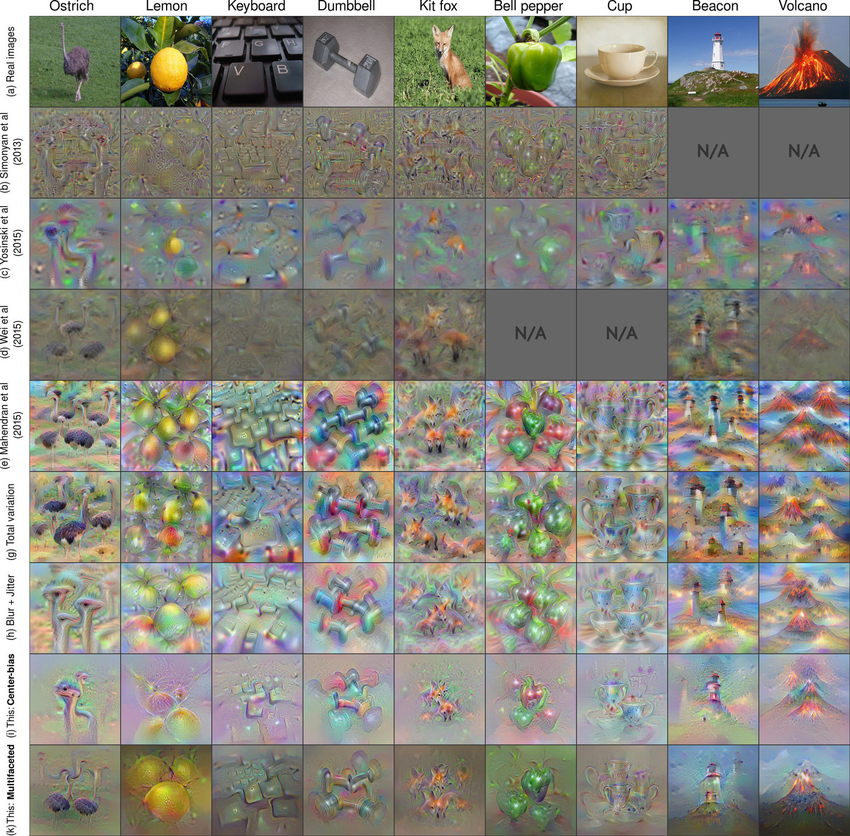

## Meaned / Aggregated AM output feature maps

In [ ]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from explaination_config import ExplainationConfig

In [2]:
os.chdir(os.path.dirname(os.getcwd()))

C:\Users\ismyn\AppData\Local\Temp\ipykernel_10364\1208603611.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


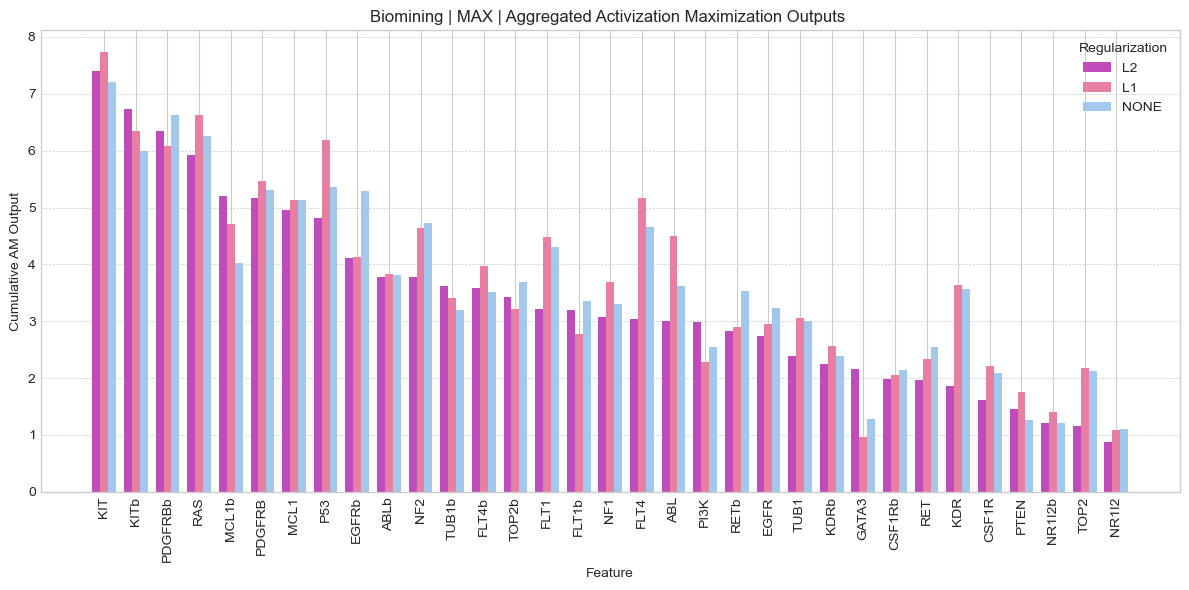

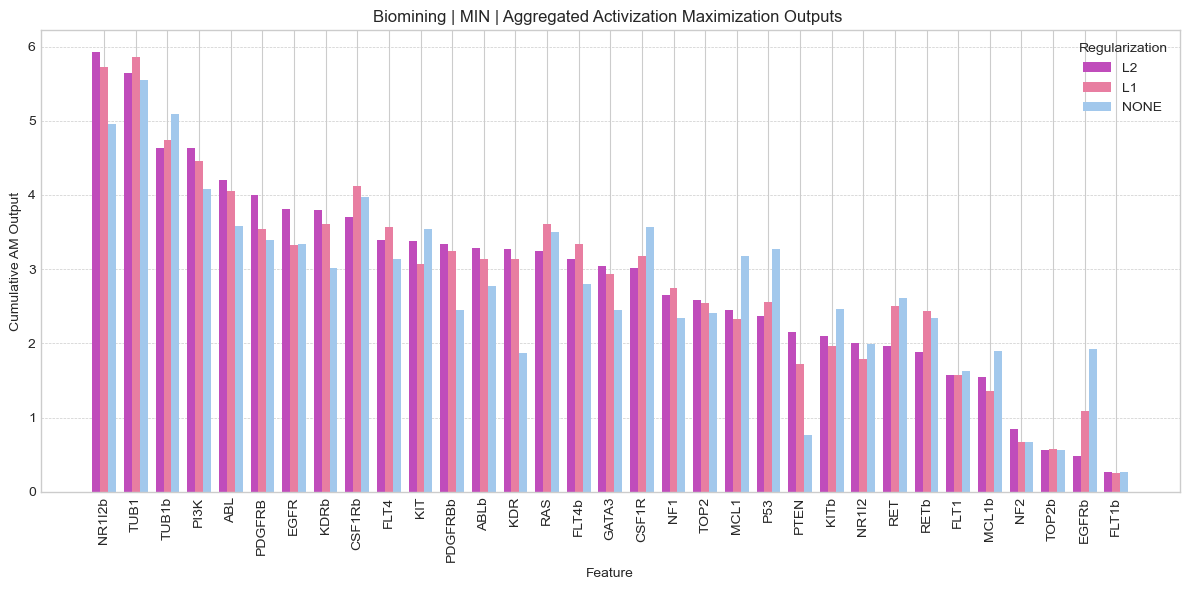

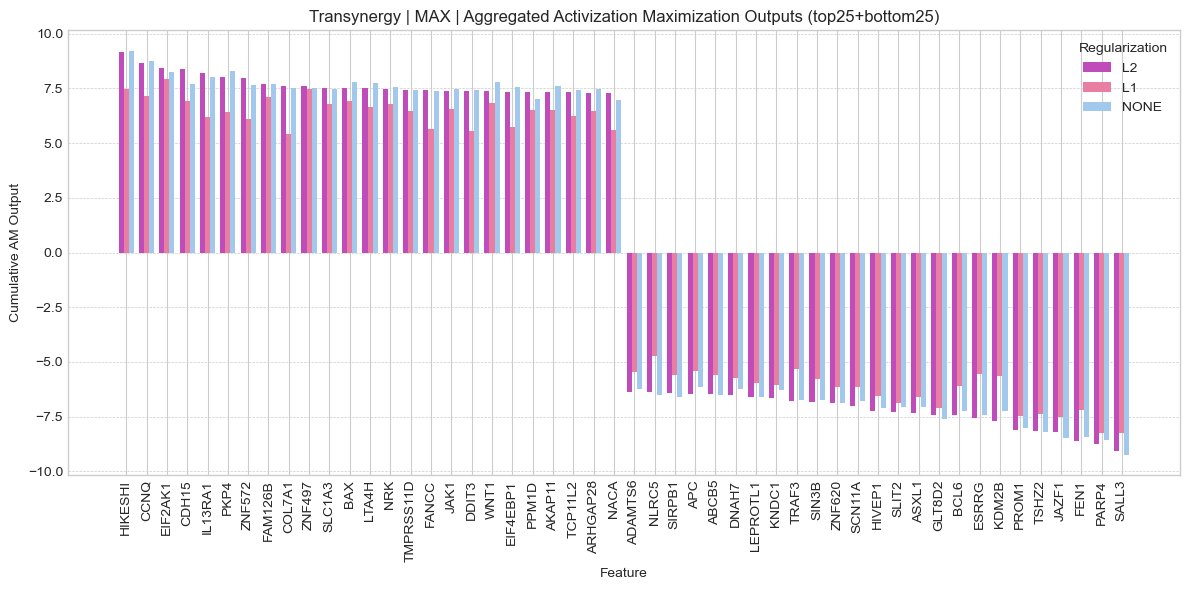

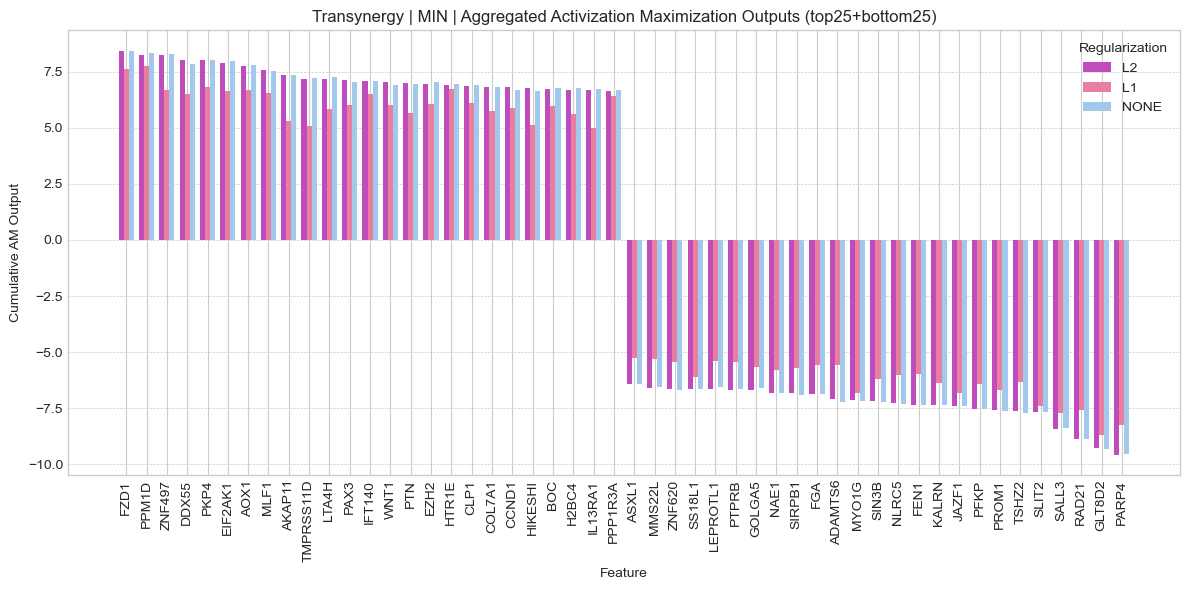

In [ ]:


# Optional: set a nice matplotlib style
plt.style.use('seaborn-whitegrid')

regularizations = ["l2", "l1", "none"]
colors = {
    "l2": "#C04CBB",   # baby blue
    "l1": "#E87EA1",   # deep pink
    "none": "#A2C8EC"  # magenta / orchid
}
minimaxis = ["max", "min"]
papers = ["biomining", "transynergy"]
dict_papers_indices_l2 = {}
for paper in papers:
    feature_names = ExplainationConfig(paper=paper).feature_names
    for minimax in minimaxis:
        SORTED_ORDER_INDICES = None
        feature_importance_all_regs = {}

        for reg in regularizations:
            path_to_experiment = f"C:/Users/ismyn/UNI/FU Berlin/SWP_Cancer/results/{paper}_{minimax}_reg_{reg}"

            feature_importance = torch.zeros(len(feature_names))
            for file in os.listdir(path_to_experiment):
                if file.endswith(".pt"):
                    tensor = torch.load(os.path.join(path_to_experiment, file))
                    feature_importance += tensor

            importance_values = feature_importance.tolist()
            feature_importance_all_regs[reg] = importance_values

            if SORTED_ORDER_INDICES is None:
                # Sort based on this reg (first one in loop)
                full_sorted_indices = sorted(
                    range(len(importance_values)), key=lambda i: importance_values[i], reverse=True
                )
                dict_papers_indices_l2[(paper, minimax)] = full_sorted_indices
                if len(feature_names) > 50:
                    # Take top 25 and bottom 25
                    top_25 = full_sorted_indices[:25]
                    bottom_25 = full_sorted_indices[-25:]
                    SORTED_ORDER_INDICES = top_25 + bottom_25
                else:
                    SORTED_ORDER_INDICES = full_sorted_indices

        sorted_feature_names = [feature_names[i] for i in SORTED_ORDER_INDICES]

        # Plot aggregated bar chart
        plt.figure(figsize=(12, 6))
        bar_width = 0.25
        x = range(len(SORTED_ORDER_INDICES))

        for idx, reg in enumerate(regularizations):
            sorted_values = [feature_importance_all_regs[reg][i] for i in SORTED_ORDER_INDICES]
            offset = [xi + (idx - 1) * bar_width for xi in x]  # shift bars
            plt.bar(offset, sorted_values, width=bar_width, label=reg.upper(), color=colors[reg])

        if len(feature_names) > 50:
            suffix = "(top25+bottom25)"
        else:
            suffix = ""
        plt.xticks(x, sorted_feature_names, rotation=90)
        plt.title(f"{paper.capitalize()} | {minimax.upper()} | Aggregated Activization Maximization Outputs {suffix}")
        plt.xlabel("Feature")
        plt.ylabel("Cumulative AM Output")
        plt.legend(title="Regularization")
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', linewidth=0.5)
        plt.show()


Sorting for biomining | max | l1
Plotting for biomining | max | 
Plotting for biomining | min | 


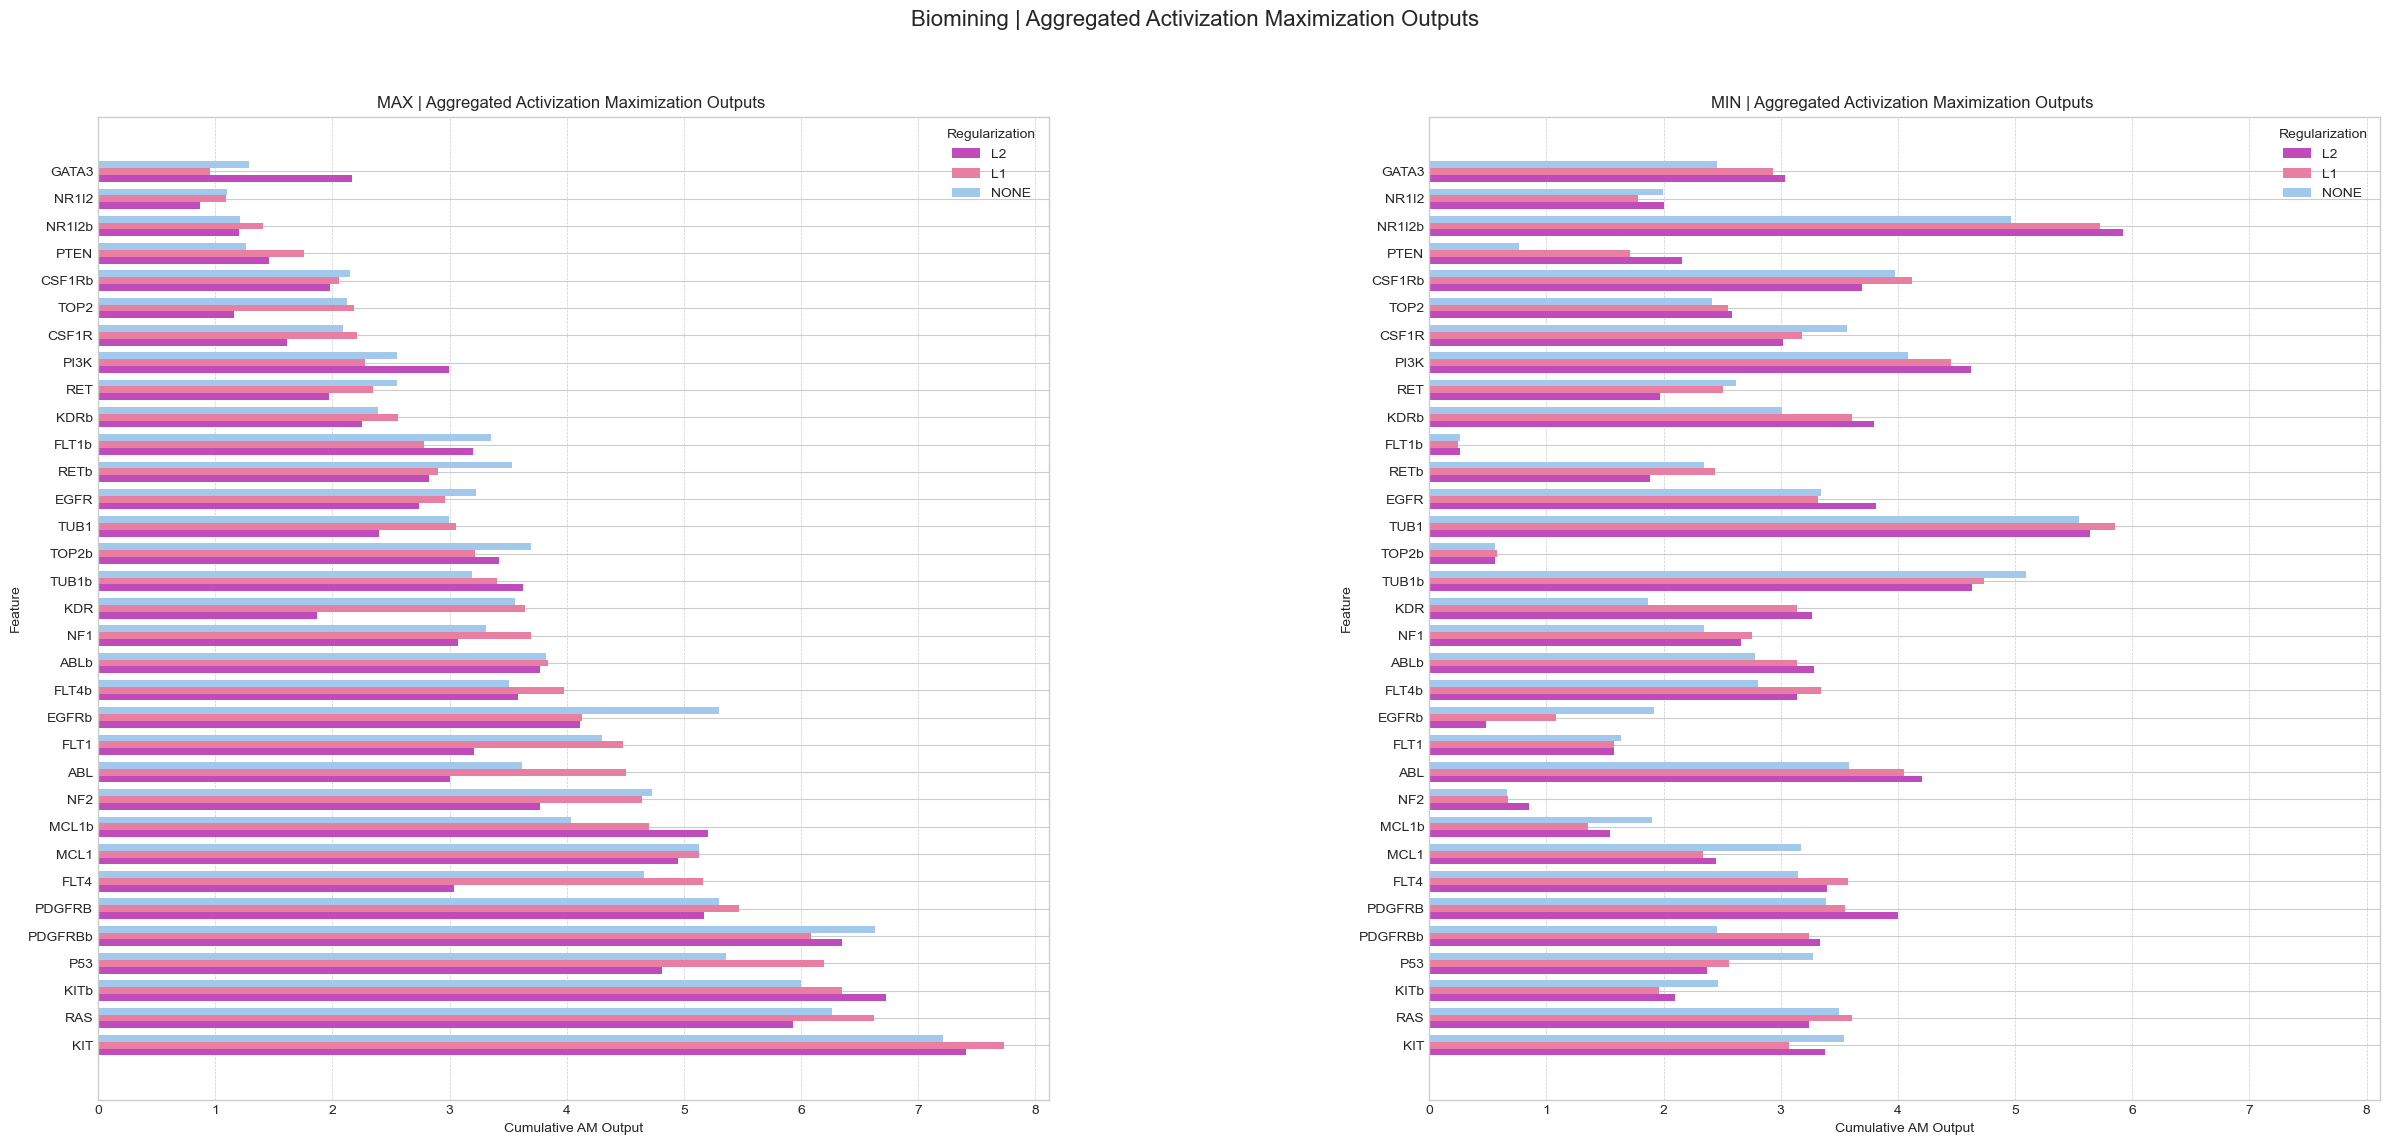

Sorting for biomining | min | l1
Plotting for biomining | min | 
Plotting for biomining | max | 


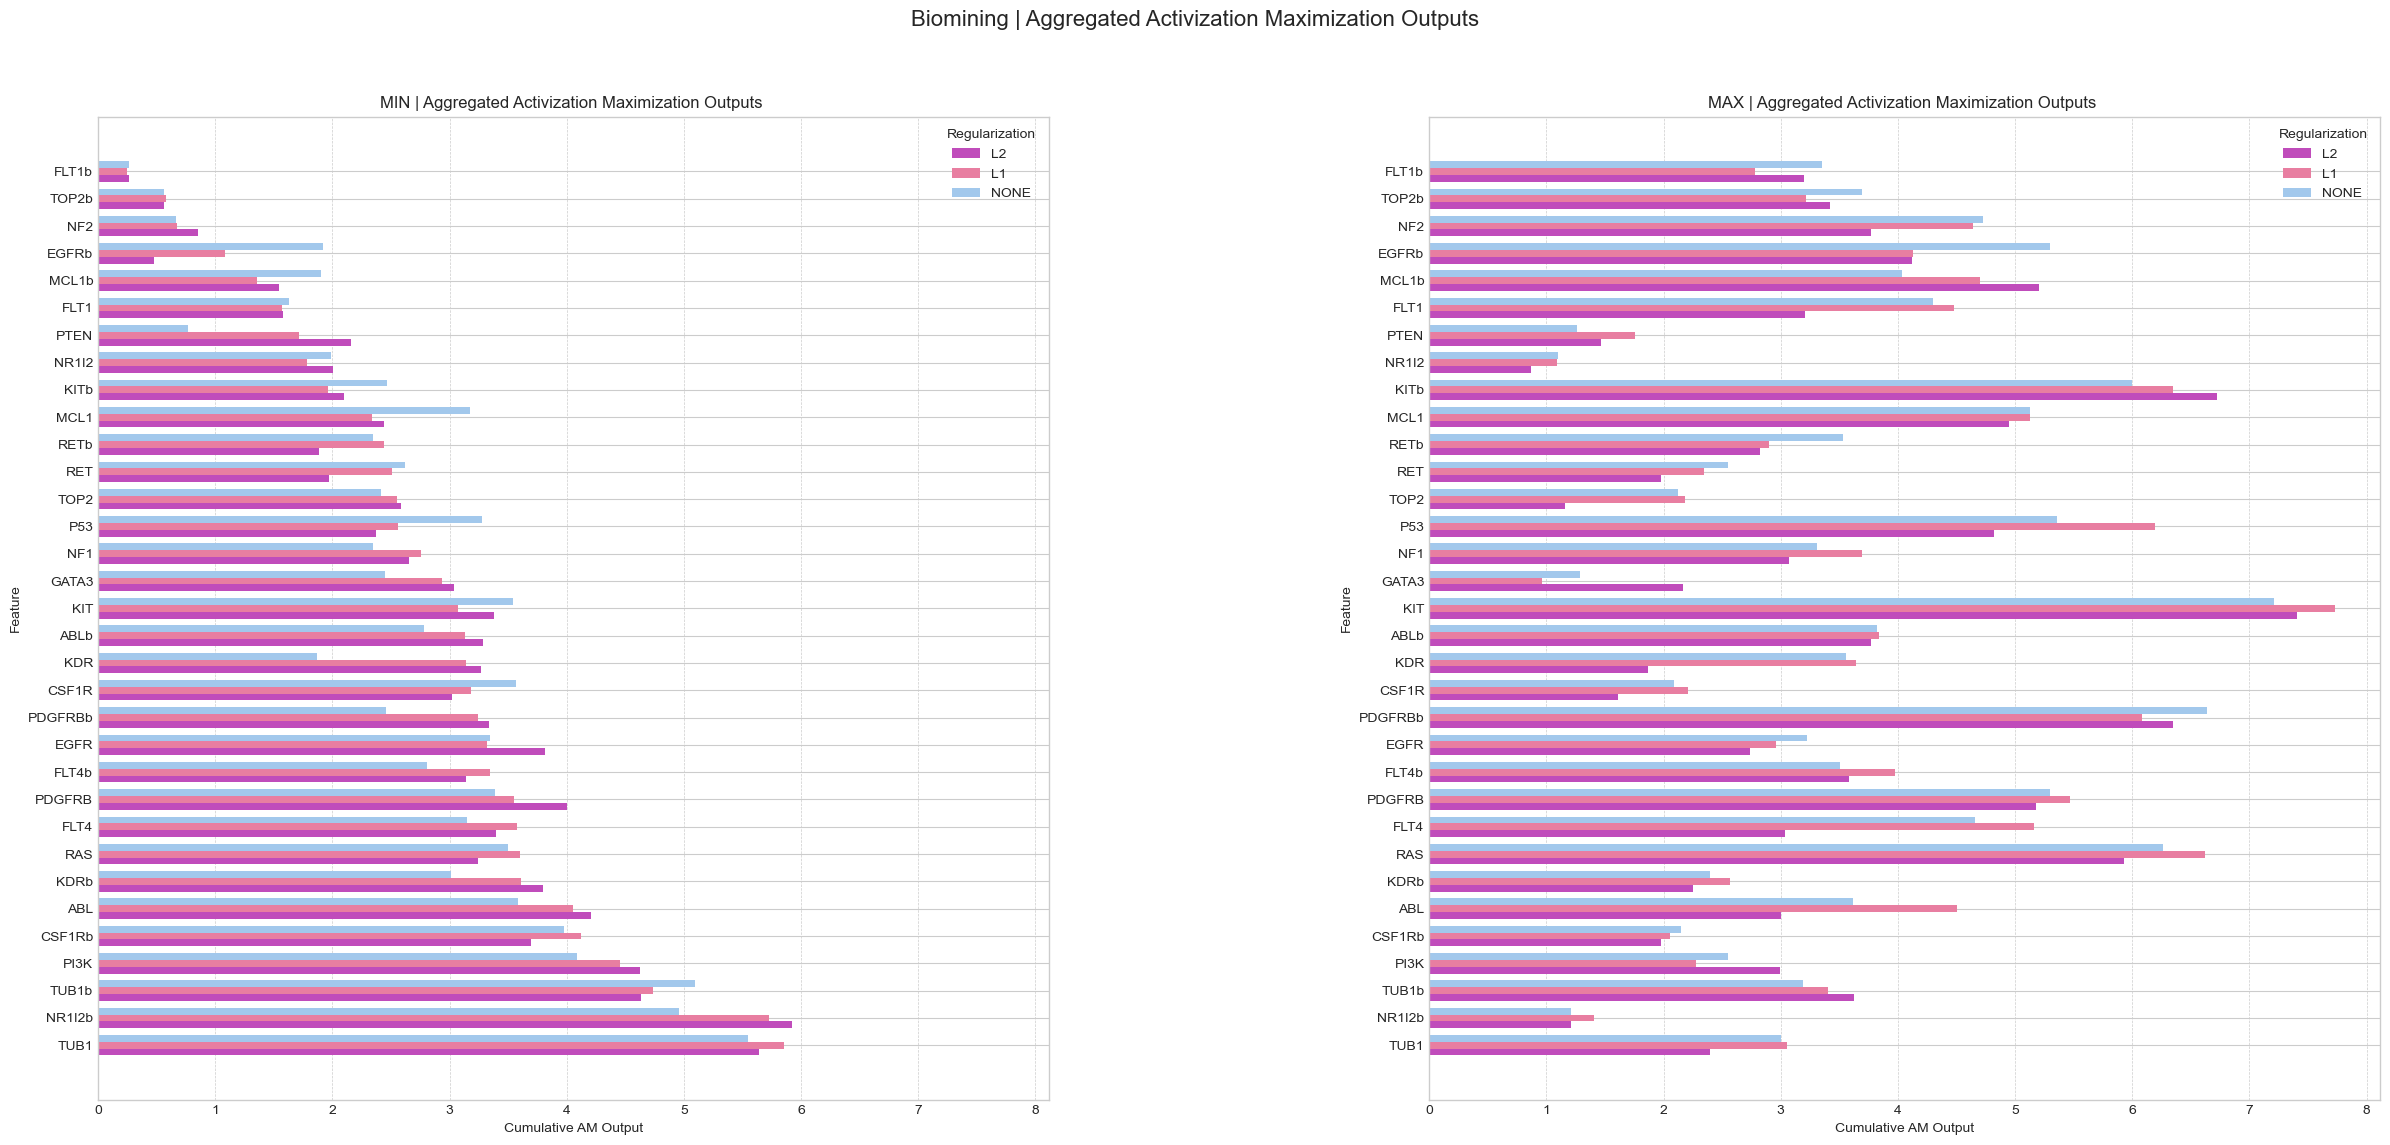

Sorting for transynergy | max | l1
Plotting for transynergy | max | (top25+bottom25)
Plotting for transynergy | min | (top25+bottom25)


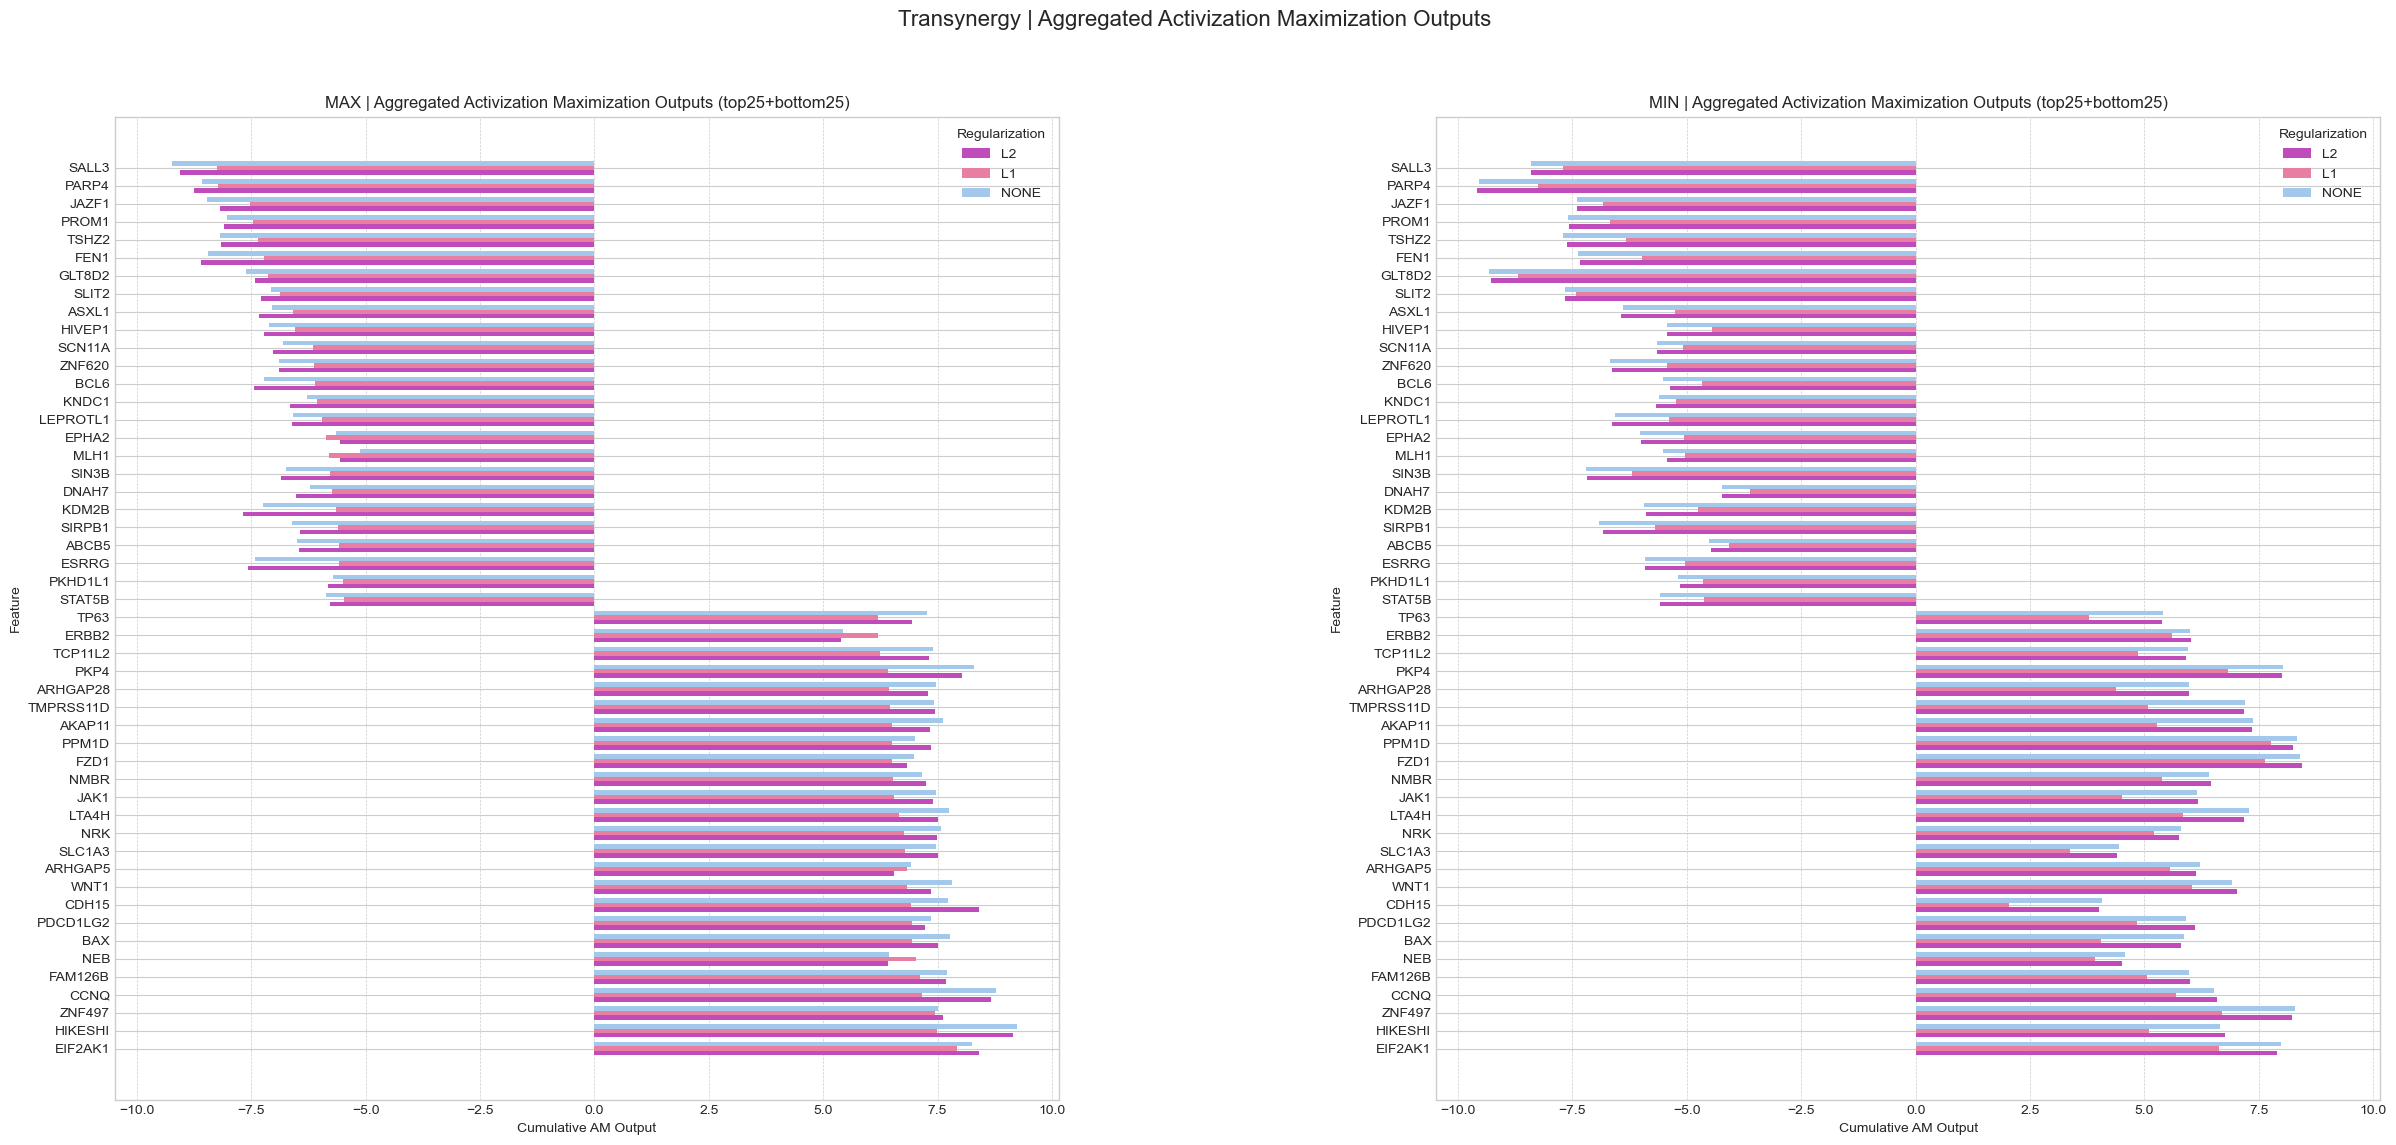

Sorting for transynergy | min | l1
Plotting for transynergy | min | (top25+bottom25)
Plotting for transynergy | max | (top25+bottom25)


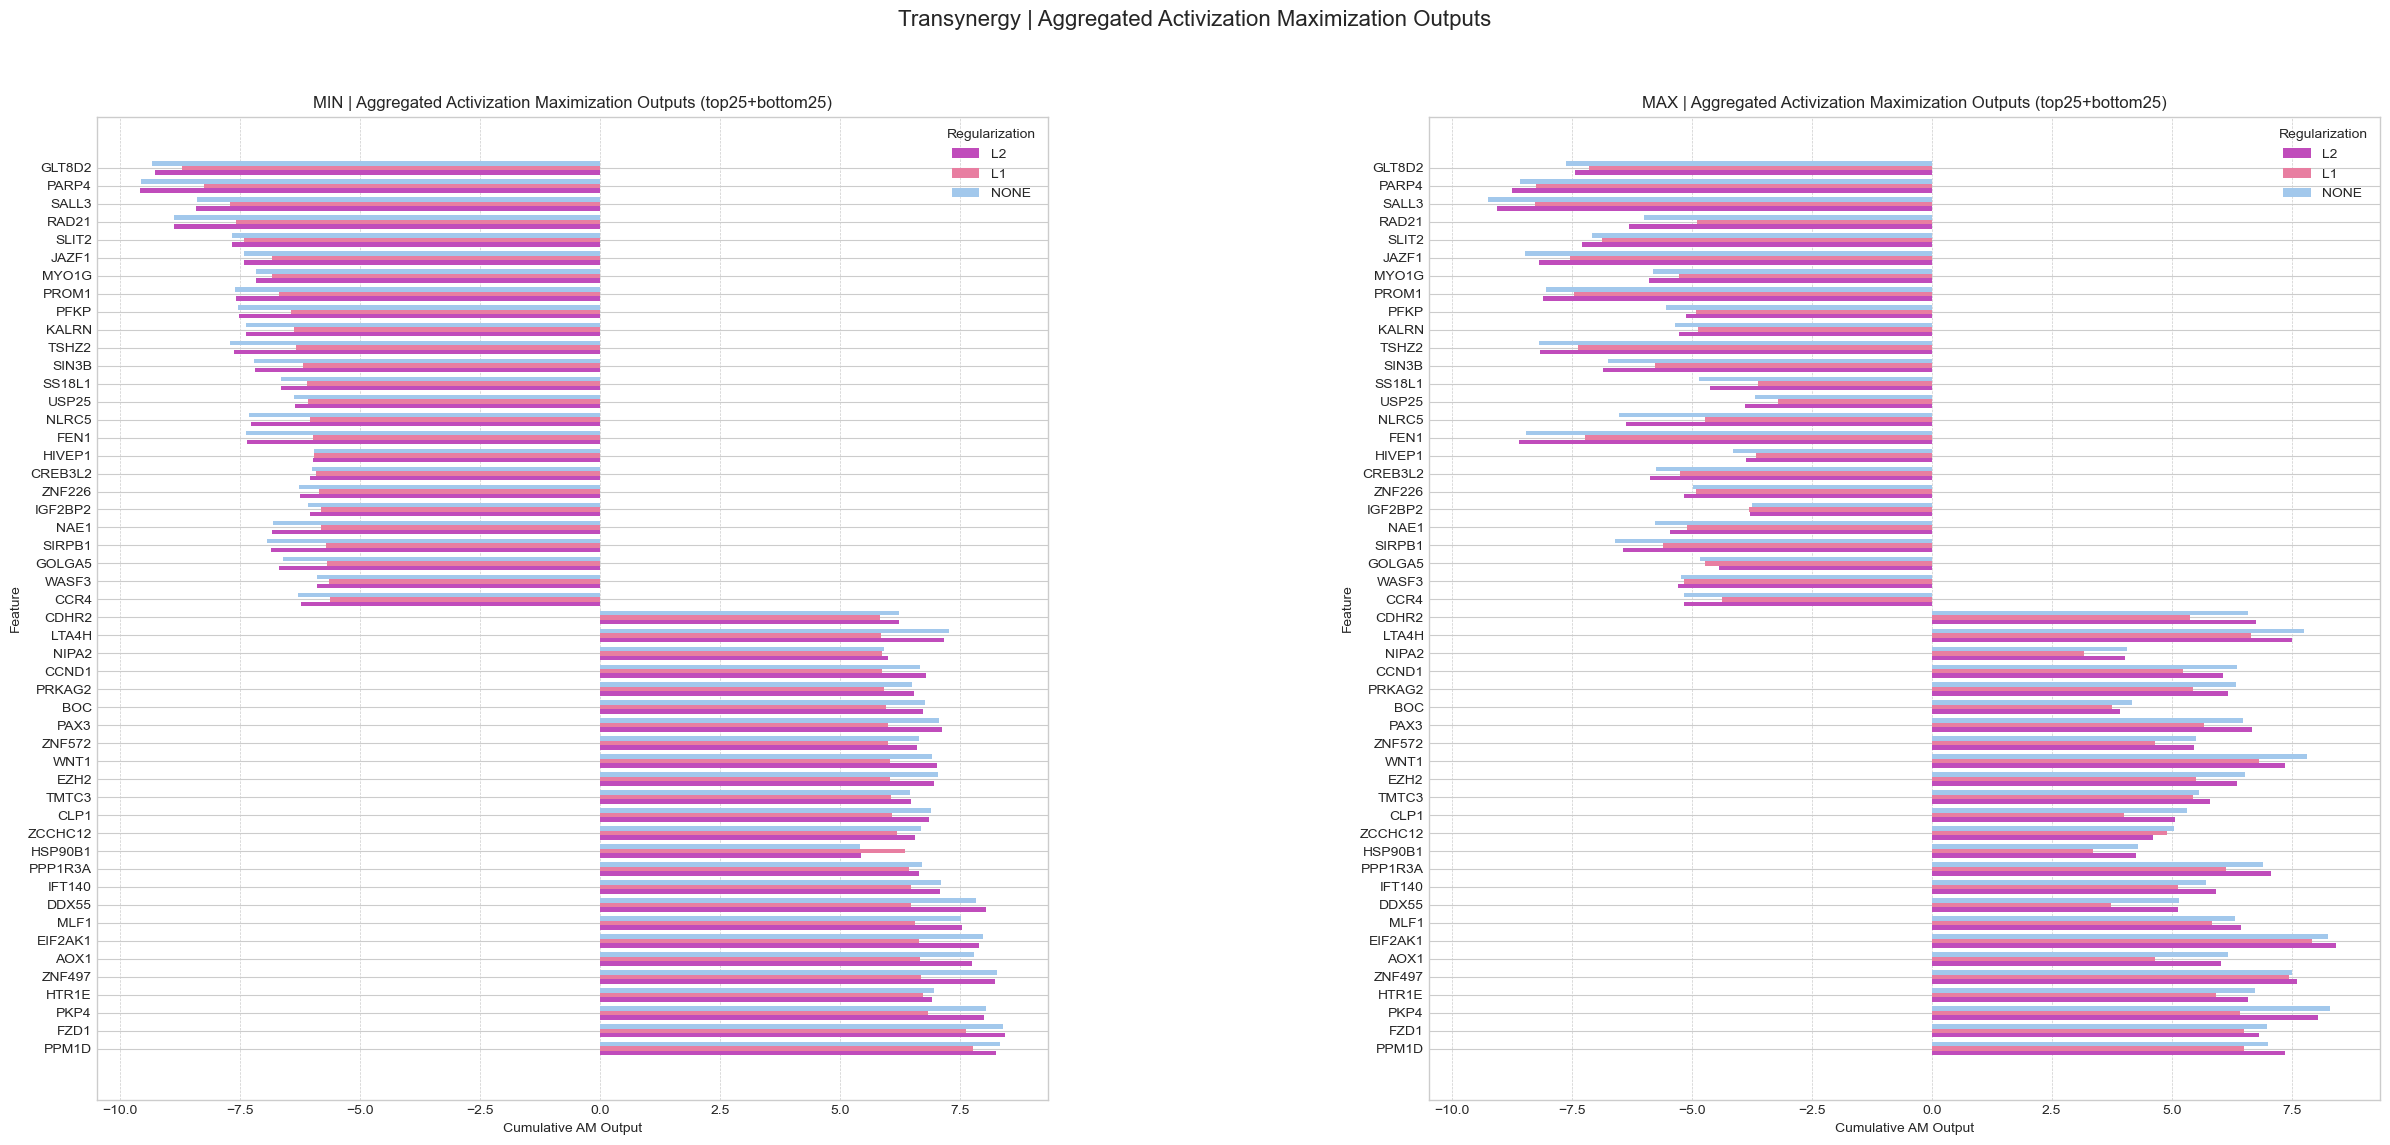

In [26]:
# now i kinda want to  do plots side by side of the minimization and maximization with the same fatures listed if that is possible and making the now x asis horizontal for the features to be listed on the y axis


for paper in papers:
    feature_names = ExplainationConfig(paper=paper).feature_names
    for minimaxis in [ ["max", "min"],  ["min", "max"]]:
        SORTED_ORDER_INDICES = None
        dict_papers_indices_l2 = {}
        fig, axes = plt.subplots(1, 2, figsize=(24, 12)) # Create subplots for min and max
        for ax_idx, minimax in enumerate(minimaxis):
            for reg in ["l1", "l2", "none"]:
                path_to_experiment = f"C:/Users/ismyn/UNI/FU Berlin/SWP_Cancer/results/{paper}_{minimax}_reg_{reg}"

                feature_importance = torch.zeros(len(feature_names))
                for file in os.listdir(path_to_experiment):
                    if file.endswith(".pt"):
                        tensor = torch.load(os.path.join(path_to_experiment, file))
                        feature_importance += tensor

                importance_values = feature_importance.tolist()
                feature_importance_all_regs[reg] = importance_values

                if SORTED_ORDER_INDICES is None:
                    # Sort based on this reg (first one in loop)
                    print(f"Sorting for {paper} | {minimax} | {reg}")
                    full_sorted_indices = sorted(
                        range(len(importance_values)), key=lambda i: importance_values[i], reverse=True
                    )
                    dict_papers_indices_l2[(paper, minimax)] = full_sorted_indices
                    if len(feature_names) > 50:
                        # Take top 25 and bottom 25
                        top_25 = full_sorted_indices[:25]
                        bottom_25 = full_sorted_indices[-25:]
                        SORTED_ORDER_INDICES = top_25 + bottom_25
                    else:
                        SORTED_ORDER_INDICES = full_sorted_indices


            sorted_feature_names = [feature_names[i] for i in SORTED_ORDER_INDICES]

            bar_width = 0.25
            y = range(len(SORTED_ORDER_INDICES)) # Use y for horizontal bars

            for idx, reg in enumerate(regularizations):
                sorted_values = [feature_importance_all_regs[reg][i] for i in SORTED_ORDER_INDICES]
                offset = [yi + (idx - 1) * bar_width for yi in y] # shift bars
                axes[ax_idx].barh(offset, sorted_values, height=bar_width, label=reg.upper(), color=colors[reg]) # Use barh

            if len(feature_names) > 50:
                suffix = "(top25+bottom25)"
            else:
                suffix = ""
            print(f"Plotting for {paper} | {minimax} | {suffix}")
            axes[ax_idx].set_yticks(y) # Use set_yticks
            axes[ax_idx].set_yticklabels(sorted_feature_names) # Use set_yticklabels
            axes[ax_idx].set_title(f"{minimax.upper()} | Aggregated Activization Maximization Outputs {suffix}")
            axes[ax_idx].set_ylabel("Feature") # Swap labels
            axes[ax_idx].set_xlabel("Cumulative AM Output")
            axes[ax_idx].legend(title="Regularization")
            axes[ax_idx].grid(axis='x', linestyle='--', linewidth=0.5) # Change grid axis

        plt.suptitle(f"{paper.capitalize()} | Aggregated Activization Maximization Outputs", fontsize=16) # Overall title
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to accommodate overall title
        # make sure x axis have same scale (get the higher scale) acriss axis 
        
        # After plotting but before setting xlim
        max_x = max(ax.get_xlim()[1] for ax in axes)
        min_x = min(ax.get_xlim()[0] for ax in axes)
        for ax in axes:
            ax.set_xlim(min_x, max_x)
        plt.subplots_adjust(wspace=0.4)
        plt.show()

We now did means of all of those features generated by the AM algorithm however this can be very much misleading, let's take a look at the variances of those featutures: are there some individual features that pretty much have a low variances ths are unchangily associated with either activization minimization or maximization? Let's take a look:)

## Variance in different regulariztions (across instances)

In [28]:
print("--- Variance Across Instances ---")

for paper in papers:
    feature_names = ExplainationConfig(paper=paper).feature_names
    num_features = len(feature_names)

    for minimax in minimaxis:
        print(f"\nPaper: {paper.capitalize()}, Minimax: {minimax.upper()}")

        for reg in regularizations:
            path_to_experiment = f"C:/Users/ismyn/UNI/FU Berlin/SWP_Cancer/results/{paper}_{minimax}_reg_{reg}"

            individual_tensors = []
            if os.path.exists(path_to_experiment):
                for file in os.listdir(path_to_experiment):
                    if file.endswith(".pt"):
                        tensor = torch.load(os.path.join(path_to_experiment, file))
                        individual_tensors.append(tensor)

            if individual_tensors:
                # Stack all individual tensors to perform variance calculation
                stacked_tensors = torch.stack(individual_tensors) # Shape: (num_instances, num_features)

                # Calculate variance for each feature across instances
                # For torch.var, keepdim=False by default, so it will return a 1D tensor of variances per feature
                feature_variances = torch.var(stacked_tensors, dim=0).tolist() # Variance across the instance dimension (dim=0)

                print(f"  Regularization: {reg.upper()}")
                print(f"    Top 5 Features by Variance:")
                # Sort features by their variance
                sorted_variance_indices = sorted(range(num_features), key=lambda i: feature_variances[i], reverse=True)
                for i in range(min(5, num_features)):
                    idx = sorted_variance_indices[i]
                    print(f"      {feature_names[idx]}: {feature_variances[idx]:.4f}")
                
                print(f"    Bottom 5 Features by Variance:")
                for i in range(min(5, num_features)):
                    idx = sorted_variance_indices[-(i + 1)]
                    print(f"      {feature_names[idx]}: {feature_variances[idx]:.4f}")
            else:
                print(f"  Regularization: {reg.upper()} - No .pt files found in {path_to_experiment}")

--- Variance Across Instances ---

Paper: Biomining, Minimax: MIN
  Regularization: L2
    Top 5 Features by Variance:
      ABL: 0.7566
      RAS: 0.5873
      PI3K: 0.5667
      MCL1: 0.4851
      P53: 0.4233
    Bottom 5 Features by Variance:
      FLT1b: 0.0137
      TUB1b: 0.0146
      TUB1: 0.0203
      EGFRb: 0.0260
      TOP2b: 0.0269
  Regularization: L1
    Top 5 Features by Variance:
      ABL: 0.6964
      PI3K: 0.6238
      RAS: 0.5985
      P53: 0.4474
      MCL1: 0.4355
    Bottom 5 Features by Variance:
      FLT1b: 0.0108
      TUB1b: 0.0174
      TOP2b: 0.0280
      TUB1: 0.0298
      PDGFRB: 0.0547
  Regularization: NONE
    Top 5 Features by Variance:
      PI3K: 0.6796
      ABL: 0.6074
      RAS: 0.5351
      MCL1: 0.4145
      EGFR: 0.4135
    Bottom 5 Features by Variance:
      FLT1b: 0.0138
      TUB1: 0.0226
      TOP2b: 0.0266
      MCL1b: 0.0384
      TUB1b: 0.0584

Paper: Biomining, Minimax: MAX
  Regularization: L2
    Top 5 Features by Variance:
      PI

### Variance across regularizations

In [ ]:
plt.style.use('seaborn-whitegrid')

regularizations = ["l2", "l1", "none"]
minimaxis = ["max", "min"]
papers = ["biomining", "transynergy"]

print("\n\n--- Variance Across Regularizations ---")

for paper in papers:
    feature_names = ExplainationConfig(paper=paper).feature_names
    num_features = len(feature_names)

    for minimax in minimaxis:
        print(f"\nPaper: {paper.capitalize()}, Minimax: {minimax.upper()}")

        feature_importance_all_regs = {} # Reset for each paper/minimax combination

        for reg in regularizations:
            path_to_experiment = f"C:/Users/ismyn/UNI/FU Berlin/SWP_Cancer/results/{paper}_{minimax}_reg_{reg}"
            feature_importance = torch.zeros(len(feature_names))

            if os.path.exists(path_to_experiment):
                for file in os.listdir(path_to_experiment):
                    if file.endswith(".pt"):
                        tensor = torch.load(os.path.join(path_to_experiment, file))
                        feature_importance += tensor 
                feature_importance_all_regs[reg] = feature_importance.tolist()
            else:
                print(f"  Warning: No data for {paper}_{minimax}_reg_{reg}. Skipping.")
                feature_importance_all_regs[reg] = [0.0] * num_features # Fill with zeros to avoid errors

        if len(feature_importance_all_regs) == len(regularizations) and all(v is not None for v in feature_importance_all_regs.values()):
            # Create a tensor where each row is the feature importance for a different regularization
            reg_values_for_variance = torch.tensor([feature_importance_all_regs[reg_key] for reg_key in regularizations])
            # Shape: (num_regularizations, num_features)

            # Calculate variance for each feature across different regularizations
            feature_variances_across_regs = torch.var(reg_values_for_variance, dim=0).tolist()

            print(f"  Variance of Feature Importance Across Regularizations:")
            print(f"    Top 5 Features by Variance:")
            sorted_variance_indices = sorted(range(num_features), key=lambda i: feature_variances_across_regs[i], reverse=True)
            for i in range(min(5, num_features)):
                idx = sorted_variance_indices[i]
                print(f"      {feature_names[idx]}: {feature_variances_across_regs[idx]:.4f}")
            
            
            print(f"    Bottom 5 Features by Variance:")
            for i in range(min(5, num_features)):
                idx = sorted_variance_indices[-(i + 1)]
                print(f"      {feature_names[idx]}: {feature_variances_across_regs[idx]:.4f}")
        else:
            print(f"  Not enough data to calculate variance across regularizations for {paper.capitalize()}, {minimax.upper()}")



--- Variance Across Regularizations ---

Paper: Biomining, Minimax: MAX
  Variance of Feature Importance Across Regularizations:
    Top 5 Features by Variance:
      FLT4: 1.2325
      KDR: 1.0099
      ABL: 0.5705
      P53: 0.4797
      FLT1: 0.4747
    Bottom 5 Features by Variance:
      ABLb: 0.0011
      CSF1Rb: 0.0072
      MCL1: 0.0109
      NR1I2b: 0.0136
      NR1I2: 0.0175

Paper: Biomining, Minimax: MIN
  Variance of Feature Importance Across Regularizations:
    Top 5 Features by Variance:
      KDR: 0.5979
      EGFRb: 0.5211
      PTEN: 0.5065
      NR1I2b: 0.2575
      PDGFRBb: 0.2328
    Bottom 5 Features by Variance:
      FLT1b: 0.0001
      TOP2b: 0.0001
      FLT1: 0.0011
      TOP2: 0.0082
      NF2: 0.0108

Paper: Transynergy, Minimax: MAX
  Variance of Feature Importance Across Regularizations:
    Top 5 Features by Variance:
      MAP2K6: 13.8518
      NDUFV2: 8.8355
      PDYN: 7.7155
      GTF2I: 7.6237
      TUBA1C: 5.4458
    Bottom 5 Features by Varianc

C:\Users\ismyn\AppData\Local\Temp\ipykernel_10364\349409408.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [39]:
import os
import torch
import numpy as np # Import numpy for variance calculation
import matplotlib.pyplot as plt
from explaination_config import ExplainationConfig

plt.style.use('seaborn-whitegrid')

regularizations = ["l2", "l1", "none"]
minimaxis = ["max", "min"]
papers = ["biomining", "transynergy"]

print("\n\n--- Total Variance ---")

for paper in papers:
    feature_names = ExplainationConfig(paper=paper).feature_names
    num_features = len(feature_names)

    for minimax in minimaxis:
        print(f"\nPaper: {paper.capitalize()}, Minimax: {minimax.upper()}")

        feature_importance_all_regs = {} # Reset for each paper/minimax combination

        for reg in regularizations:
            path_to_experiment = f"C:/Users/ismyn/UNI/FU Berlin/SWP_Cancer/results/{paper}_{minimax}_reg_{reg}"
            feature_importance = None
            if os.path.exists(path_to_experiment):
                for file in os.listdir(path_to_experiment):
                    if file.endswith(".pt"):
                        tensor = torch.load(os.path.join(path_to_experiment, file))
                        if feature_importance is not None:
                            feature_importance = torch.cat([tensor.unsqueeze(0), feature_importance], dim=0)
                        else:
                            feature_importance = tensor.unsqueeze(0)
                feature_importance_all_regs[reg] = feature_importance
            else:
                print(f"  Warning: No data for {paper}_{minimax}_reg_{reg}. Skipping.")
                feature_importance_all_regs[reg] = [0.0] * num_features # Fill with zeros to avoid errors

        if len(feature_importance_all_regs) == len(regularizations):
            # Create a tensor where each row is the feature importance for a different regularization
            reg_values_for_variance = torch.cat([feature_importance_all_regs[reg_key] for reg_key in regularizations], dim =0)
            # Shape: (num_regularizations, num_features)
            print(f"  Shape of reg_values_for_variance: {reg_values_for_variance.shape}")

            # Calculate variance for each feature across different regularizations
            feature_variances_across_regs = torch.var(reg_values_for_variance, dim=0).tolist()

            print(f"  Variance of Feature Importance Across Regularizations:")
            print(f"    Top 5 Features by Variance:")
            sorted_variance_indices = sorted(range(num_features), key=lambda i: feature_variances_across_regs[i], reverse=True)
            for i in range(min(5, num_features)):
                idx = sorted_variance_indices[i]
                print(f"      {feature_names[idx]}: {feature_variances_across_regs[idx]:.4f}")
            
            
            print(f"    Bottom 5 Features by Variance:")
            for i in range(min(5, num_features)):
                idx = sorted_variance_indices[-(i + 1)]
                print(f"      {feature_names[idx]}: {feature_variances_across_regs[idx]:.4f}")
        else:
            print(f"  Not enough data to calculate variance across regularizations for {paper.capitalize()}, {minimax.upper()}")



--- Total Variance ---

Paper: Biomining, Minimax: MAX
  Shape of reg_values_for_variance: torch.Size([15, 33])
  Variance of Feature Importance Across Regularizations:
    Top 5 Features by Variance:
      KDR: 0.4828
      MCL1b: 0.4821
      RAS: 0.4675
      EGFR: 0.3995
      NF2: 0.3778
    Bottom 5 Features by Variance:
      PDGFRB: 0.0347
      TUB1b: 0.0767
      NR1I2: 0.0847
      TOP2b: 0.1149
      P53: 0.1308

Paper: Biomining, Minimax: MIN
  Shape of reg_values_for_variance: torch.Size([15, 33])
  Variance of Feature Importance Across Regularizations:
    Top 5 Features by Variance:
      ABL: 0.5916
      PI3K: 0.5365
      RAS: 0.4927
      MCL1: 0.3874
      P53: 0.3615
    Bottom 5 Features by Variance:
      FLT1b: 0.0110
      TUB1: 0.0215
      TOP2b: 0.0233
      TUB1b: 0.0275
      MCL1b: 0.0478

Paper: Transynergy, Minimax: MAX
  Shape of reg_values_for_variance: torch.Size([15, 7206])
  Variance of Feature Importance Across Regularizations:
    Top 5 Featur

C:\Users\ismyn\AppData\Local\Temp\ipykernel_10364\1027723017.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


C:\Users\ismyn\AppData\Local\Temp\ipykernel_10364\3109242748.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Generating 'Total Variance' plots (with top25/bottom25 logic) and storing variances by feature name...

Processing Biomining | MAX for total variance...
  Shape of combined_feature_data for variance calculation: torch.Size([15, 33])
  Stored total variances for Biomining | MAX by feature name.


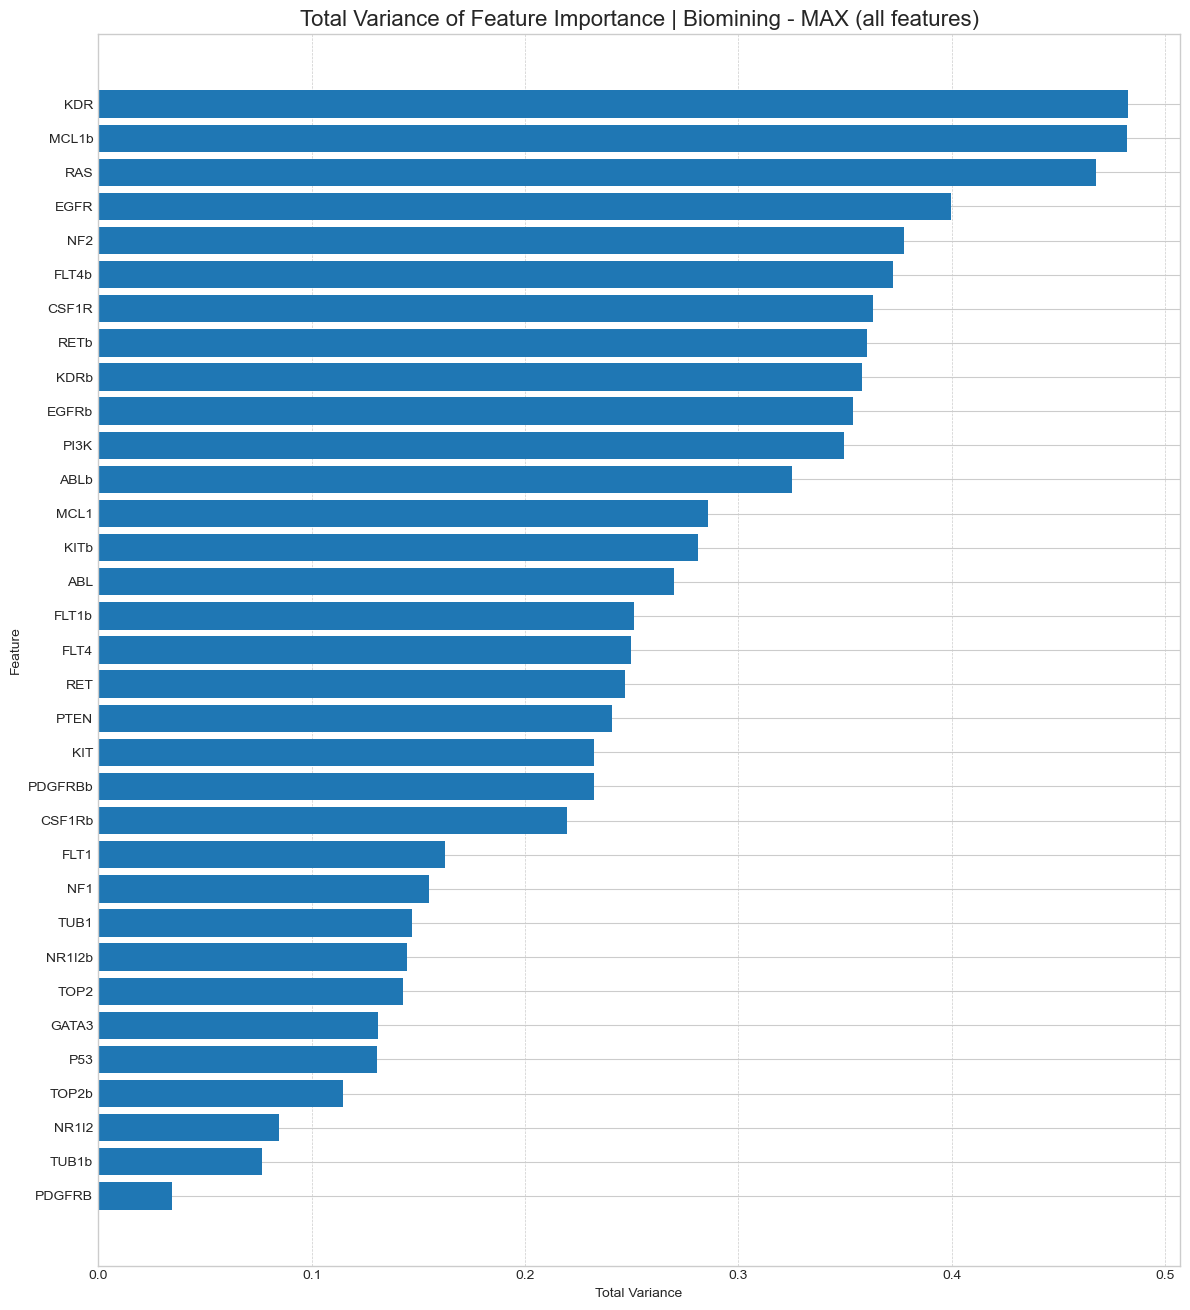


Processing Biomining | MIN for total variance...
  Shape of combined_feature_data for variance calculation: torch.Size([15, 33])
  Stored total variances for Biomining | MIN by feature name.


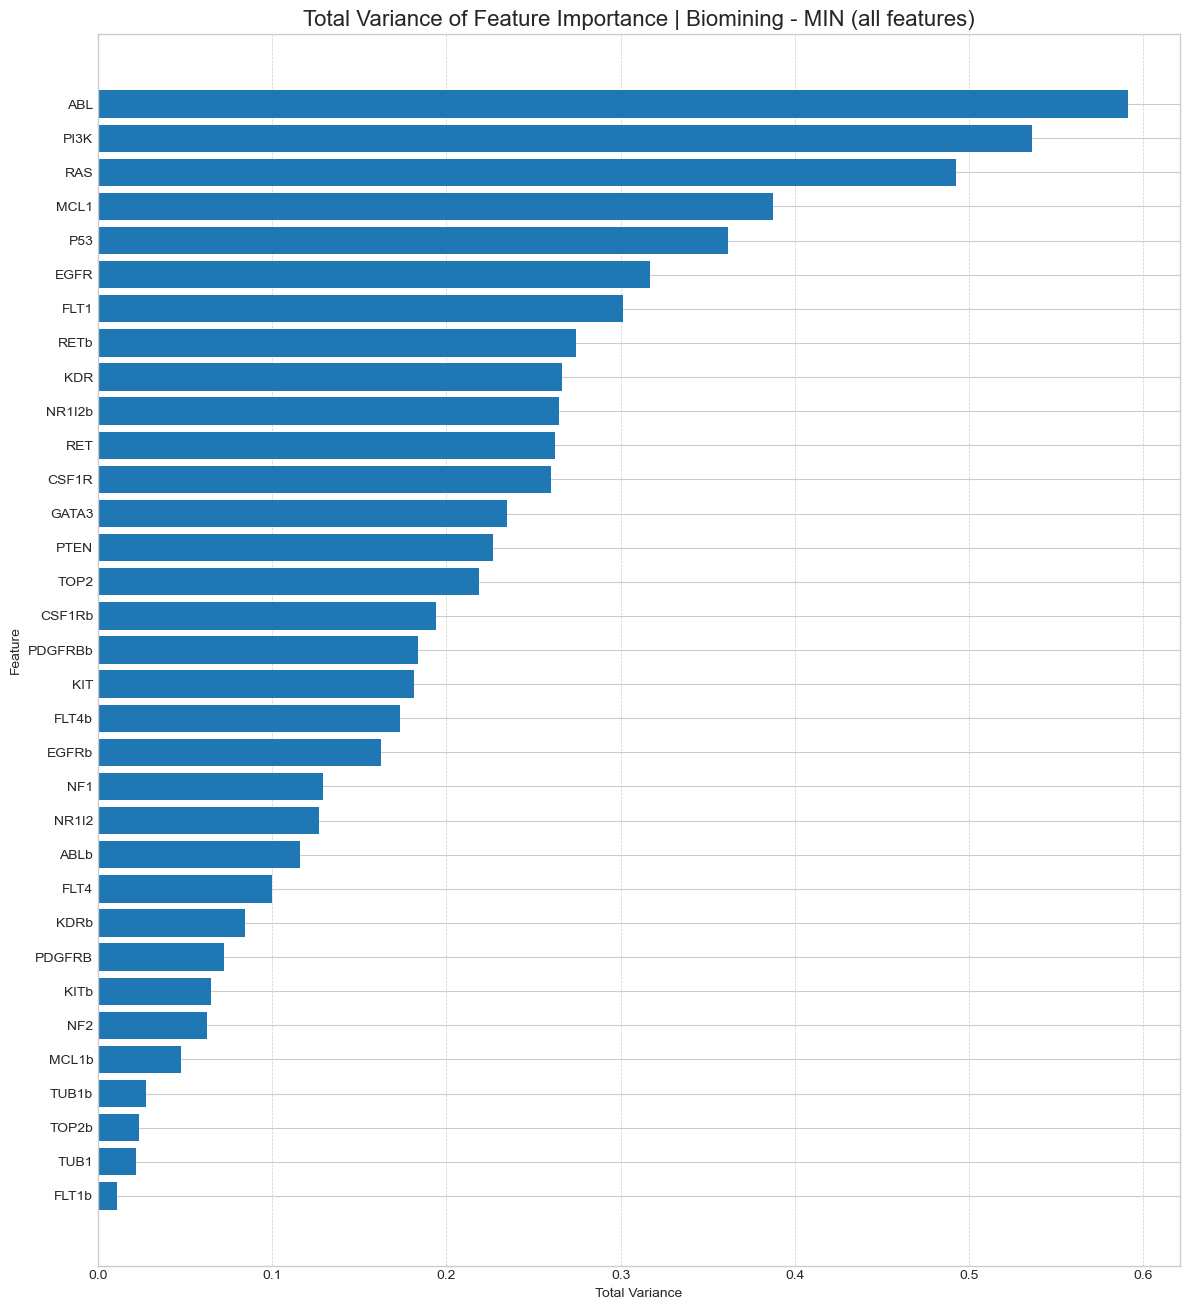


Processing Transynergy | MAX for total variance...
  Shape of combined_feature_data for variance calculation: torch.Size([15, 7206])
  Stored total variances for Transynergy | MAX by feature name.


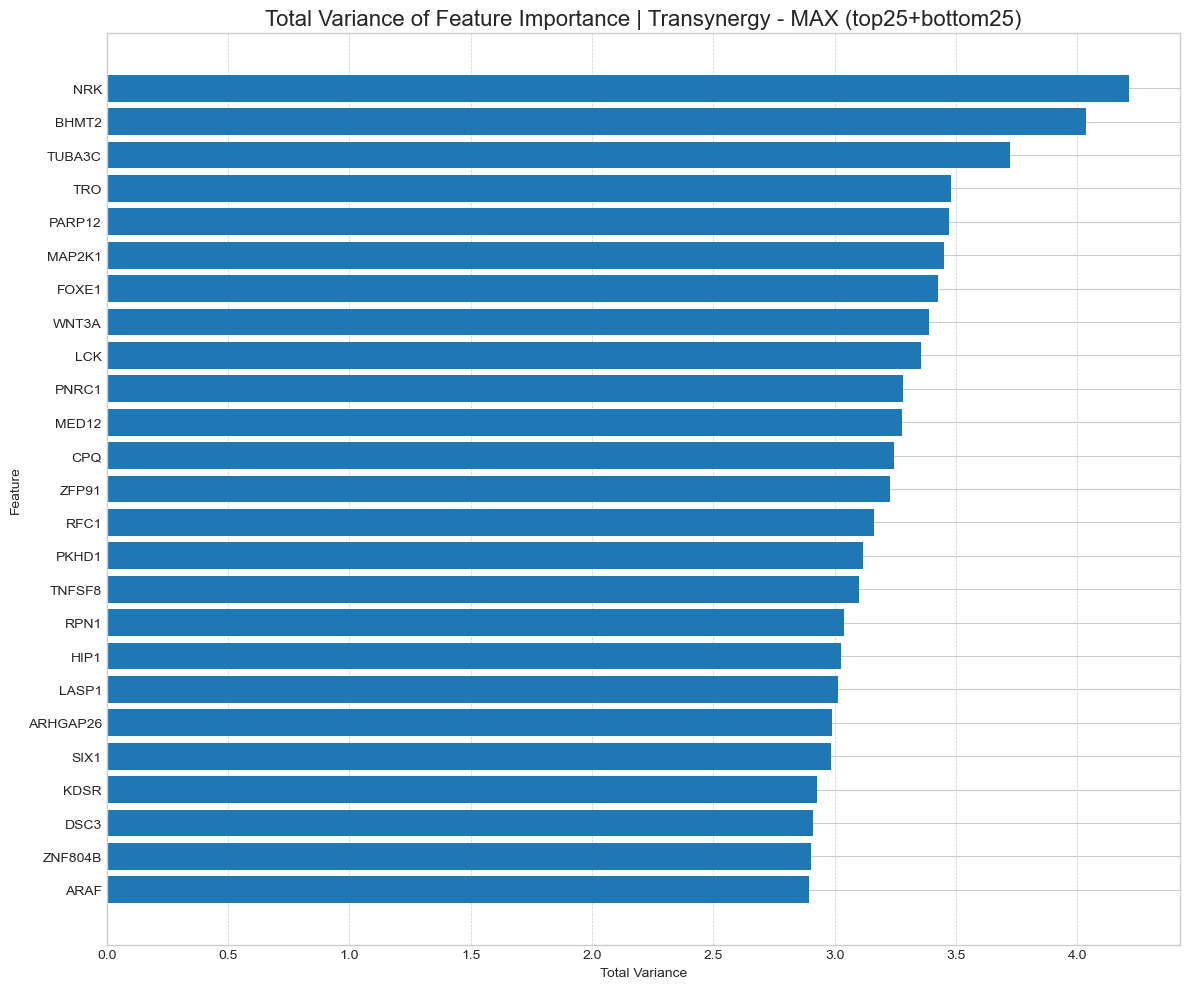


Processing Transynergy | MIN for total variance...
  Shape of combined_feature_data for variance calculation: torch.Size([15, 7206])
  Stored total variances for Transynergy | MIN by feature name.


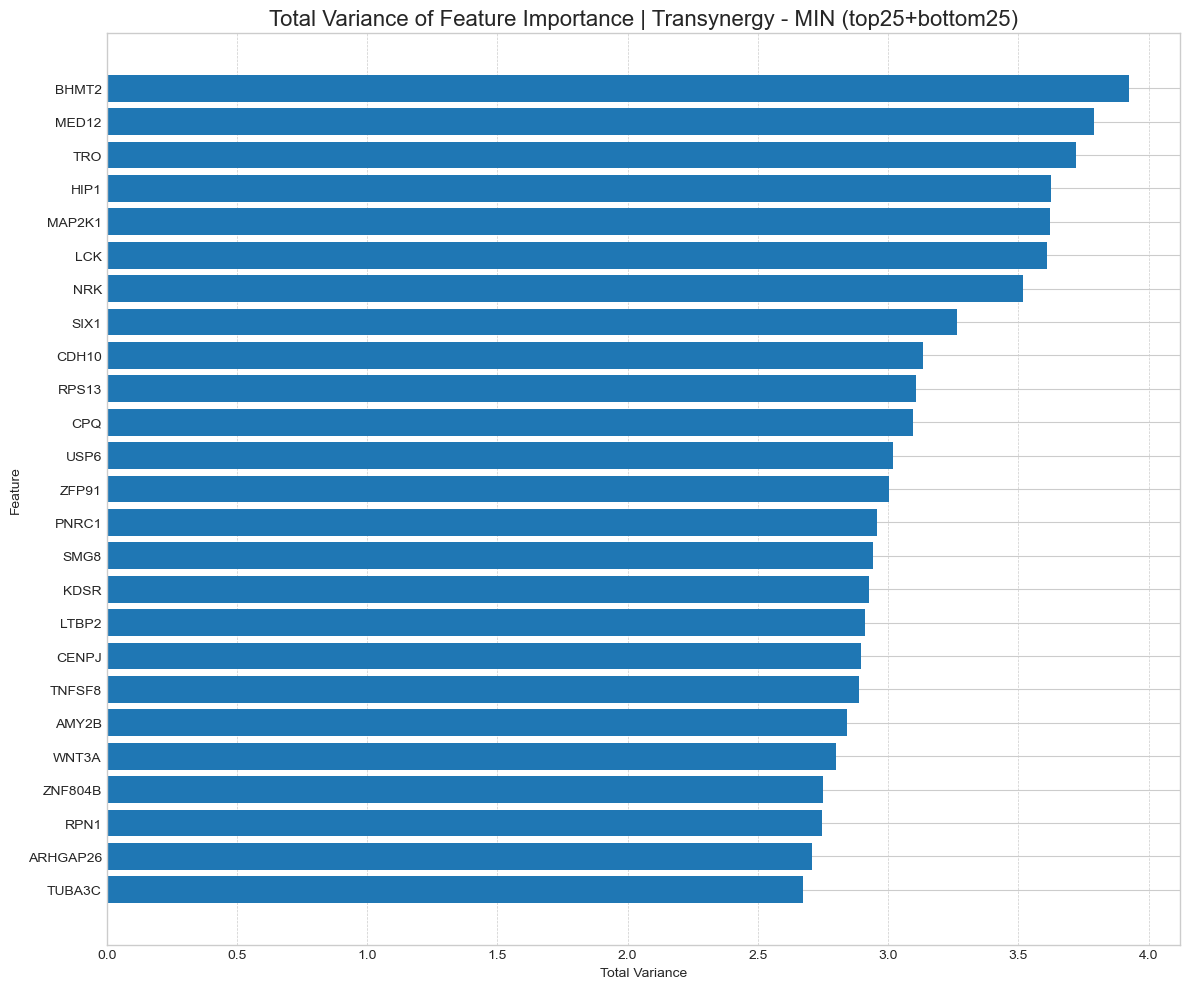


'Total Variance' plots generated and variances stored by feature name.

--- Example of accessing stored total variances by feature name ---
Accessing variances for Paper: biomining, Minimax: max
  Variance of 'ABL': 0.2698
Accessing variances for Paper: biomining, Minimax: min
  Variance of 'ABL': 0.5916
Accessing variances for Paper: transynergy, Minimax: max
  Variance of 'GDF5': 0.3139
Accessing variances for Paper: transynergy, Minimax: min
  Variance of 'GDF5': 0.0973


In [ ]:
plt.style.use('seaborn-whitegrid')

regularizations = ["l2", "l1", "none"]
minimaxis = ["max", "min"]
papers = ["biomining", "transynergy"]

total_variances_by_config = {}

print("Generating 'Total Variance' plots (with top25/bottom25 logic) and storing variances by feature name...")

for paper in papers:
    feature_names = ExplainationConfig(paper=paper).feature_names
    num_features = len(feature_names)

    for minimax in minimaxis:
        all_individual_tensors_for_total_variance = []

        print(f"\nProcessing {paper.capitalize()} | {minimax.upper()} for total variance...")

        for reg in regularizations:
            path_to_experiment = f"C:/Users/ismyn/UNI/FU Berlin/SWP_Cancer/results/{paper}_{minimax}_reg_{reg}"

            if os.path.exists(path_to_experiment):
                for file in os.listdir(path_to_experiment):
                    if file.endswith(".pt"):
                        tensor = torch.load(os.path.join(path_to_experiment, file))
                        all_individual_tensors_for_total_variance.append(tensor.unsqueeze(0))
            else:
                print(f"  Warning: Path not found for {paper}_{minimax}_reg_{reg}. Skipping files from this config.")

        if all_individual_tensors_for_total_variance:
            combined_feature_data = torch.cat(all_individual_tensors_for_total_variance, dim=0)
            print(f"  Shape of combined_feature_data for variance calculation: {combined_feature_data.shape}")

            total_feature_variances = torch.var(combined_feature_data, dim=0).tolist()

            feature_variance_map = {
                feature_names[i]: total_feature_variances[i] for i in range(num_features)
            }
            total_variances_by_config[(paper, minimax)] = feature_variance_map
            print(f"  Stored total variances for {paper.capitalize()} | {minimax.upper()} by feature name.")

            sorted_variance_items = sorted(feature_variance_map.items(), key=lambda item: item[1], reverse=True)
            # sorted_variance_items is a list of (feature_name, variance_value) tuples

            suffix = ""
            features_to_plot_names = []
            features_to_plot_variances = []

            if num_features > 50:
                # Take top 25 and bottom 25
                top_25_items = sorted_variance_items[:25]
                bottom_25_items = sorted_variance_items[max(0, num_features - 25):]
                features_to_plot_items = top_25_items + bottom_25_items
                suffix = "(top25+bottom25)"
            else:
                # If 50 or fewer features, plot all
                features_to_plot_items = sorted_variance_items
                suffix = "(all features)"

            # Extract names and variances for plotting
            plot_feature_names = [item[0] for item in features_to_plot_items]
            plot_variances = [item[1] for item in features_to_plot_items]


            # --- Plotting ---
            plt.figure(figsize=(12, max(8, len(plot_feature_names) * 0.4))) # Dynamic height
            y_pos = np.arange(len(plot_feature_names))
            plt.barh(y_pos, plot_variances, color='#1f77b4')

            plt.yticks(y_pos, plot_feature_names)
            plt.gca().invert_yaxis() # Highest variance feature at the top

            plt.title(f'Total Variance of Feature Importance | {paper.capitalize()} - {minimax.upper()} {suffix}', fontsize=16)
            plt.xlabel('Total Variance')
            plt.ylabel('Feature')
            plt.grid(axis='x', linestyle='--', linewidth=0.5)
            plt.tight_layout()
            plt.show()
        else:
            print(f"  No data found to calculate total variance for {paper.capitalize()} | {minimax.upper()}.")

print("\n'Total Variance' plots generated and variances stored by feature name.")

# --- Example of how to access the stored variances by feature name ---
print("\n--- Example of accessing stored total variances by feature name ---")
for (paper_key, minimax_key), feature_variance_map in total_variances_by_config.items():
    print(f"Accessing variances for Paper: {paper_key}, Minimax: {minimax_key}")
    # You can now access variances directly by feature name
    if feature_variance_map:
        # Get the first feature name (arbitrary example)
        first_feature_name = next(iter(feature_variance_map))
        print(f"  Variance of '{first_feature_name}': {feature_variance_map[first_feature_name]:.4f}")

        # Or, iterate through all features and their variances
        # for feature, variance in feature_variance_map.items():
        #     print(f"  '{feature}': {variance:.4f}")
    else:
        print("  No variances stored for this configuration.")

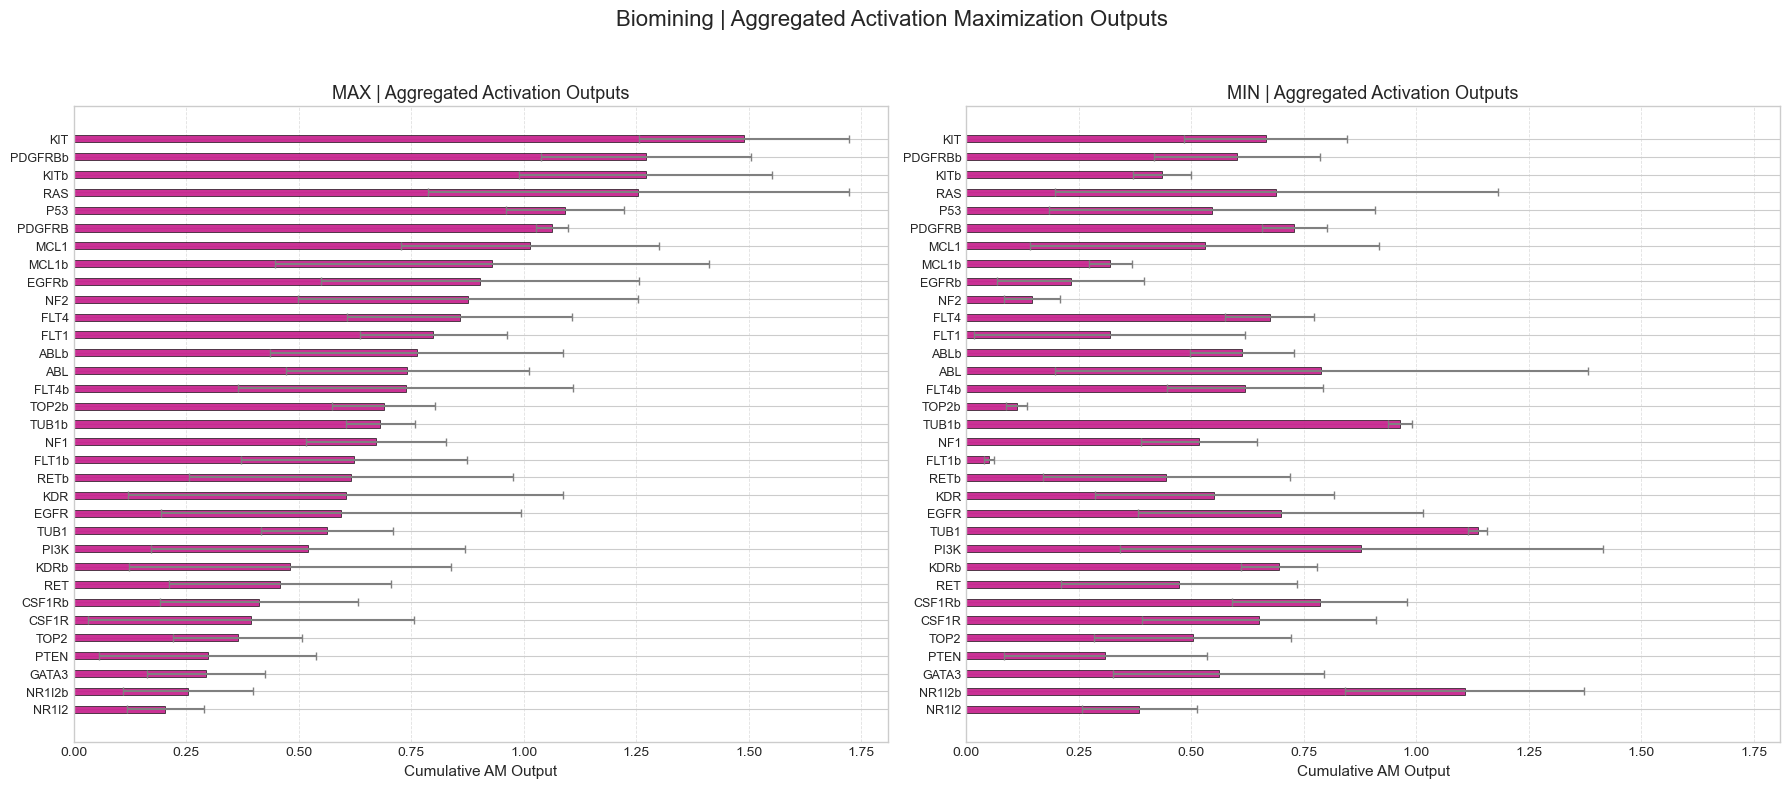

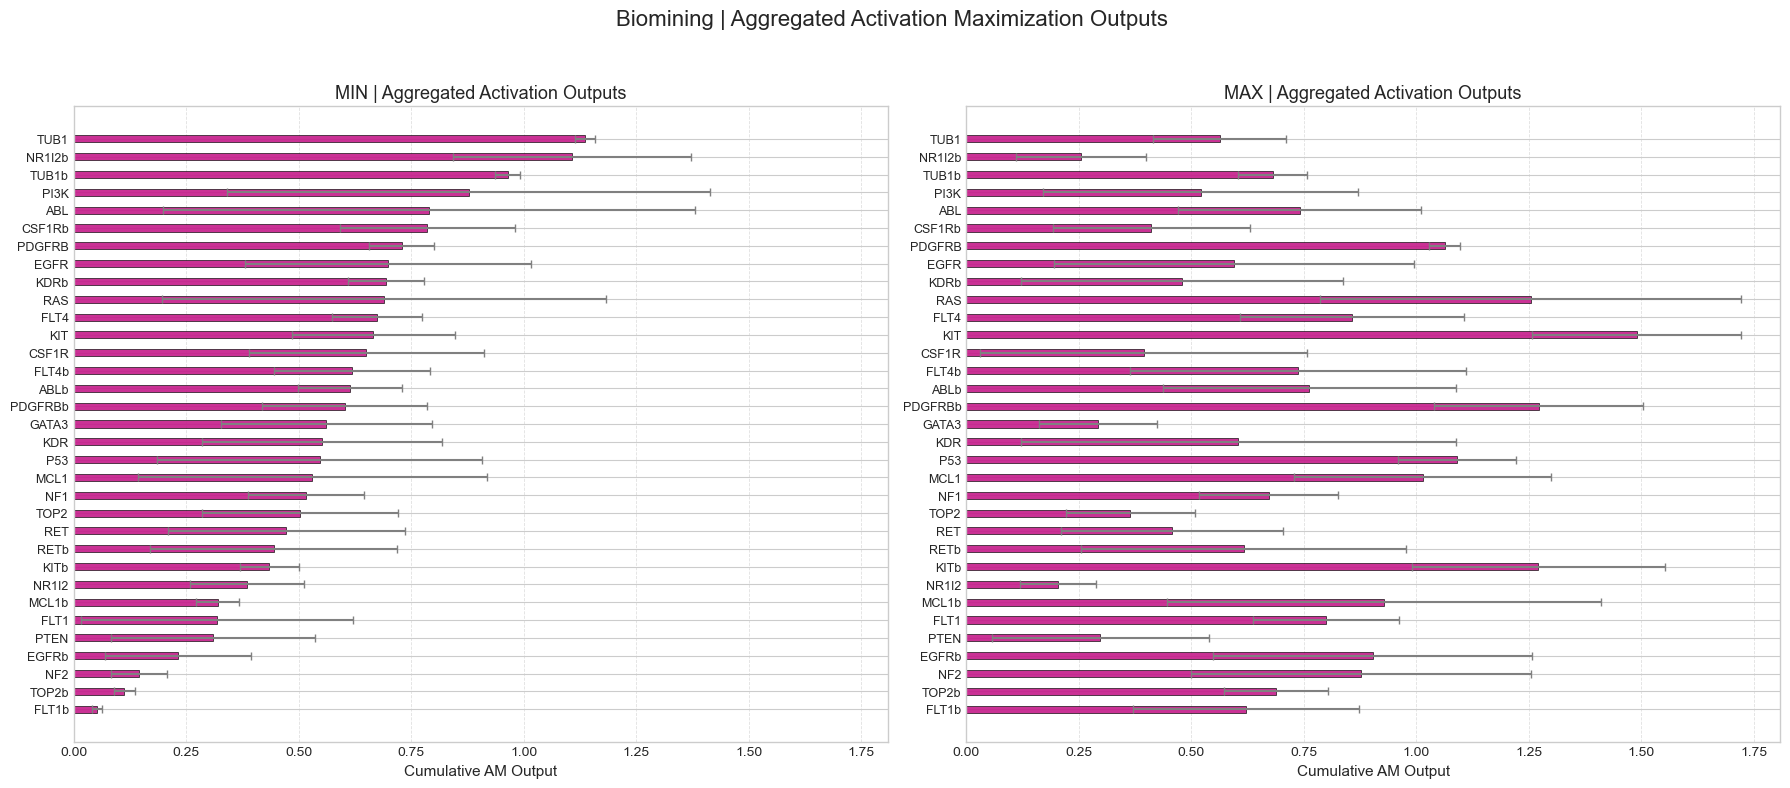

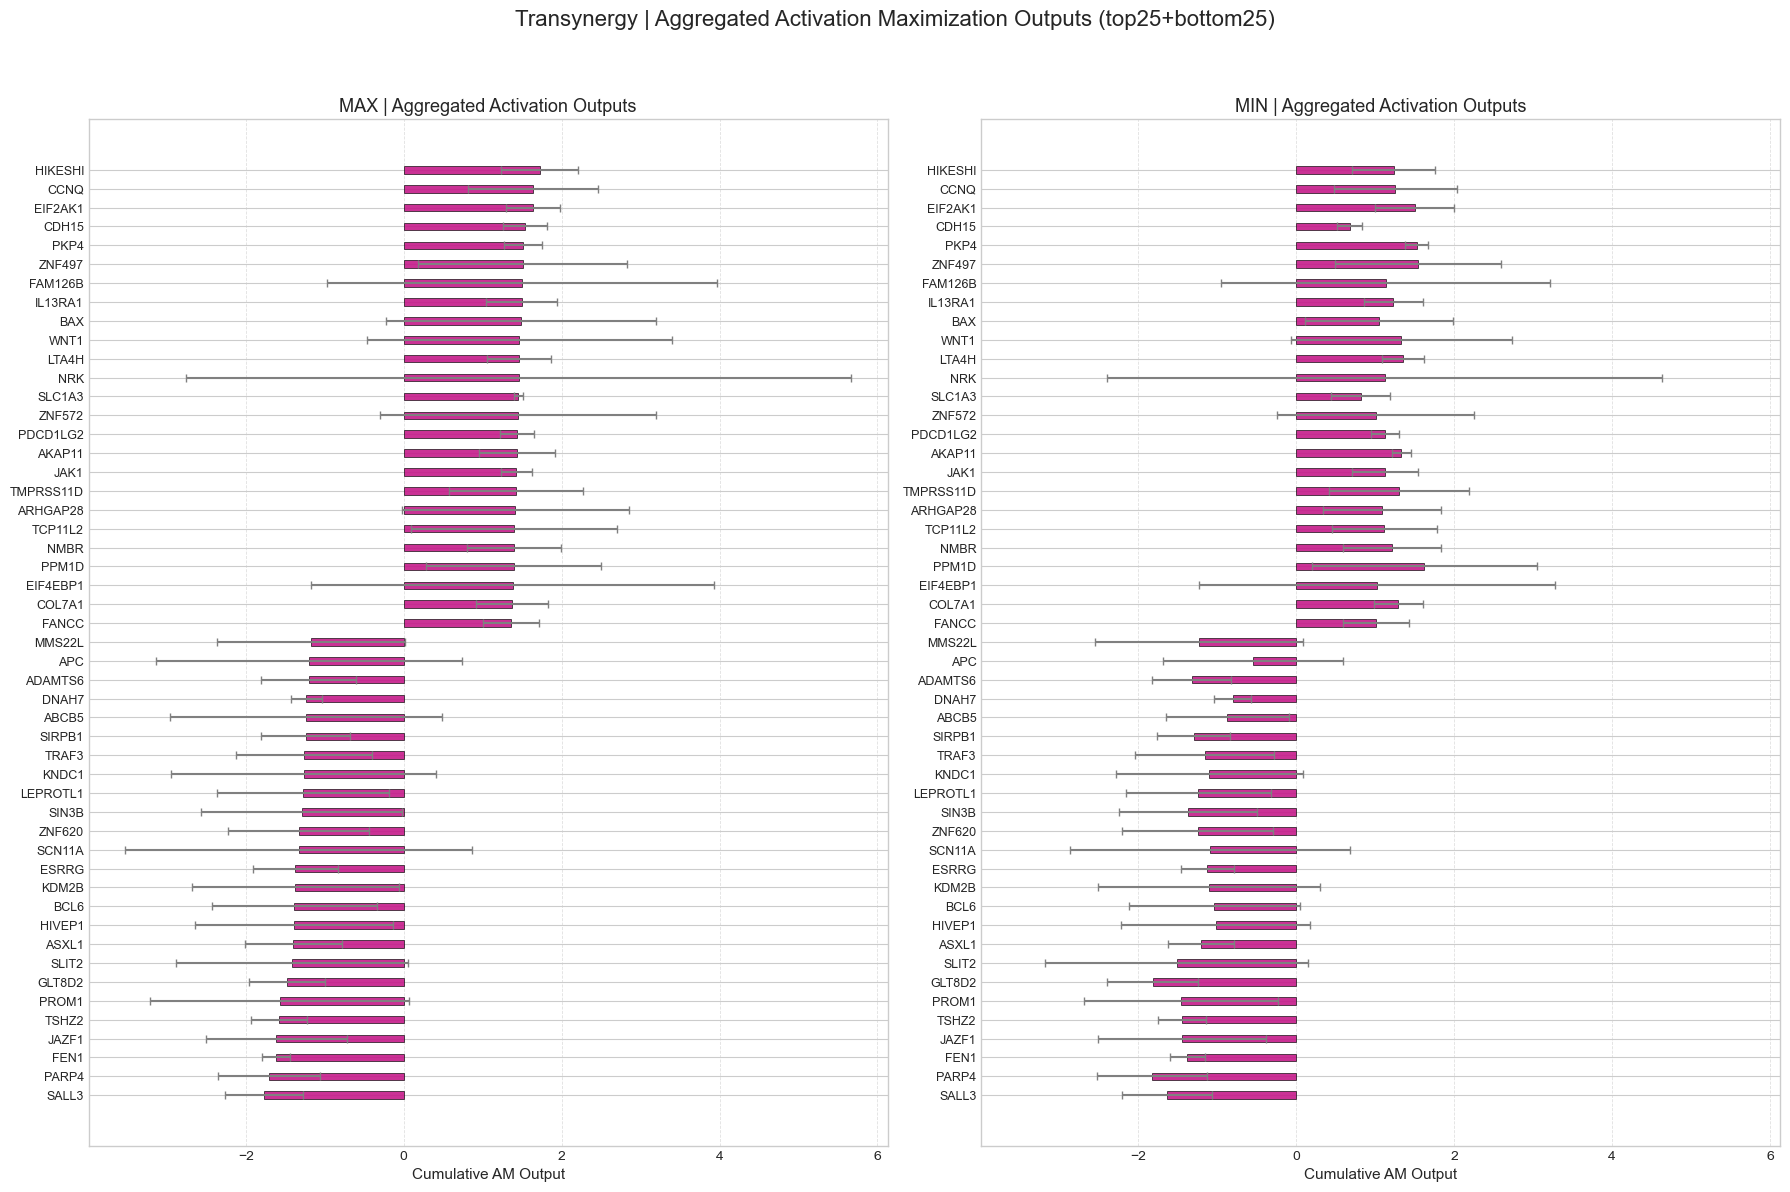

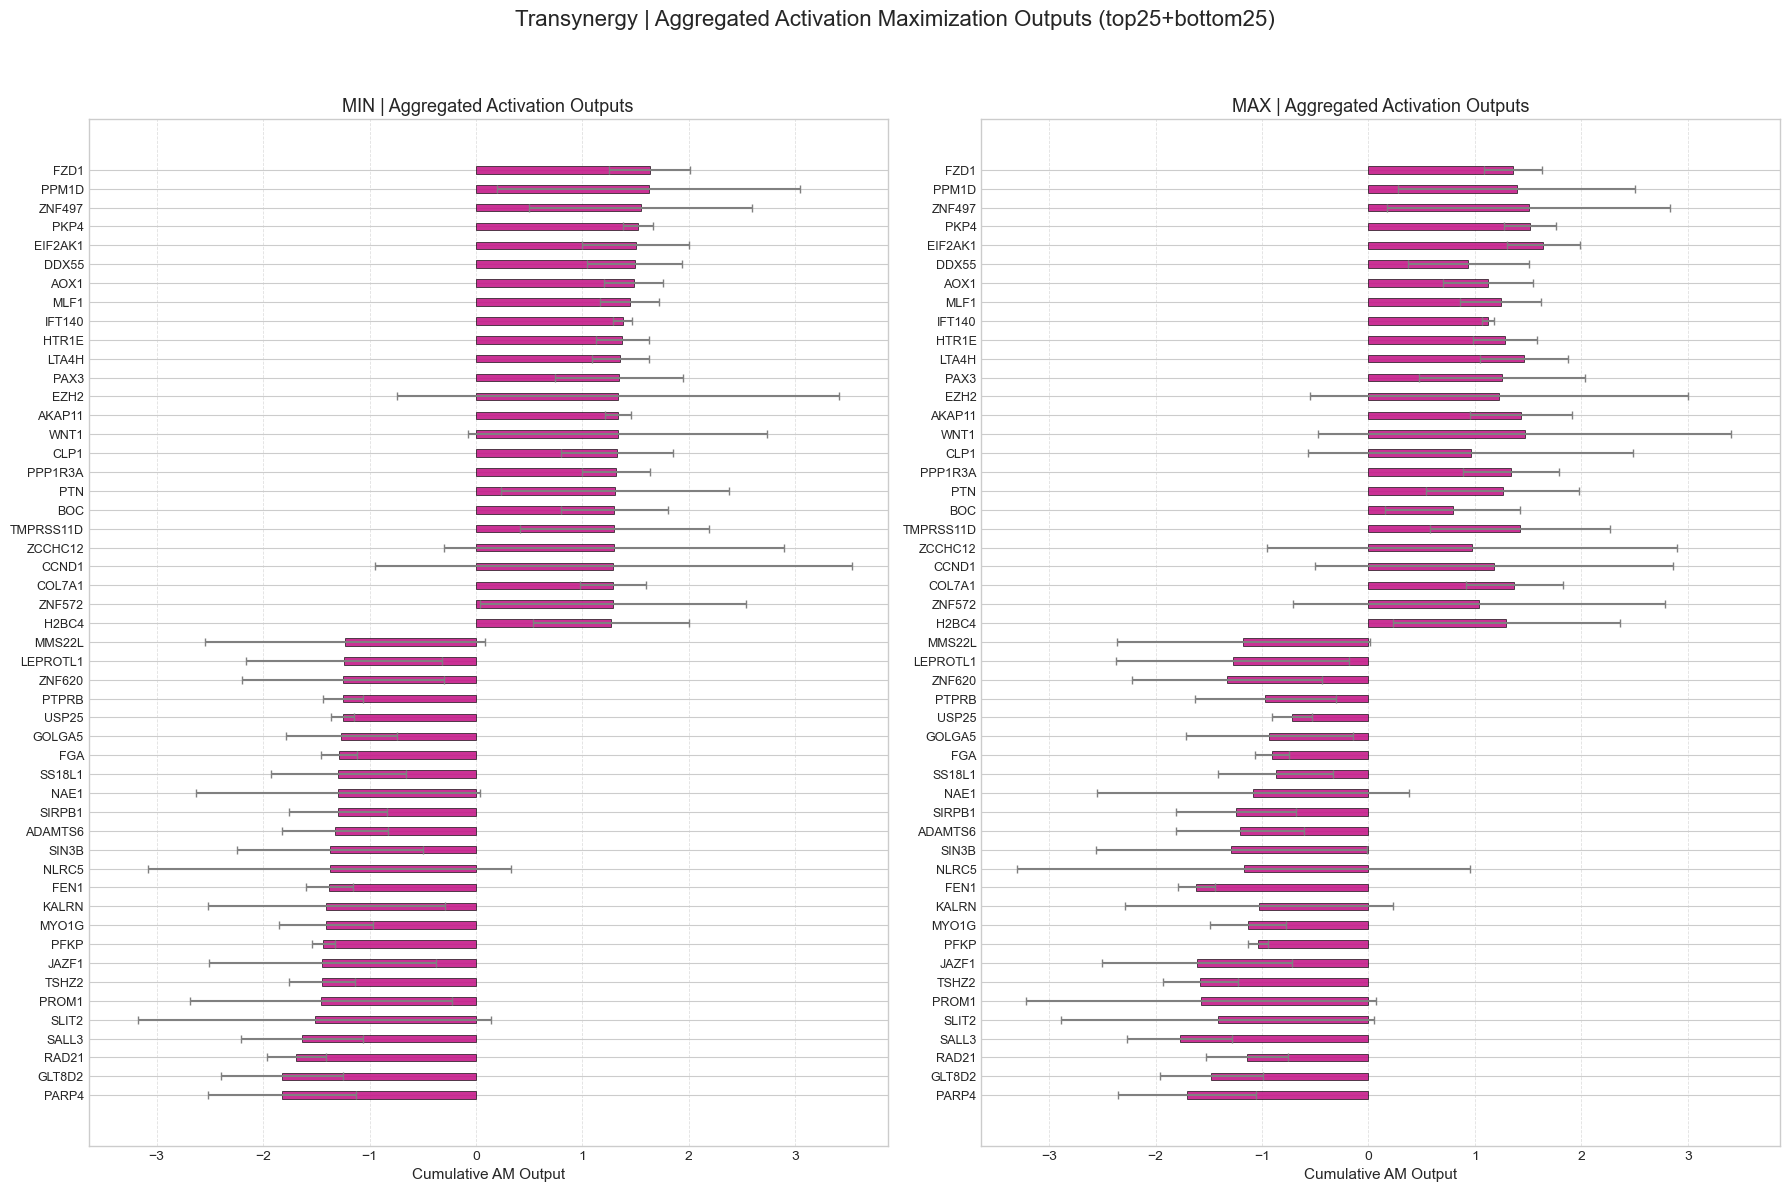

In [67]:
import matplotlib.pyplot as plt
import torch
import os
import matplotlib.ticker as ticker

for paper in papers:
    feature_names = ExplainationConfig(paper=paper).feature_names
    for minimaxis in [["max", "min"], ["min", "max"]]:
        SORTED_ORDER_INDICES = None
        dict_papers_indices_l2 = {}

        # Decide number of features to plot
        if len(feature_names) > 50:
            height = 25 + 25
            suffix = "(top25+bottom25)"
        else:
            height = len(feature_names)
            suffix = ""

        fig, axes = plt.subplots(1, 2, figsize=(18, max(6, height * 0.25)))

        for ax_idx, minimax in enumerate(minimaxis):
            feature_importance = torch.zeros(len(feature_names))
            for reg in ["l1", "l2", "none"]:
                path_to_experiment = f"C:/Users/ismyn/UNI/FU Berlin/SWP_Cancer/results/{paper}_{minimax}_reg_{reg}"
                for file in os.listdir(path_to_experiment):
                    if file.endswith(".pt"):
                        tensor = torch.load(os.path.join(path_to_experiment, file))
                        feature_importance += tensor
            feature_importance /= (5 * 3)
            importance_values = feature_importance.tolist()

            full_sorted_indices = sorted(range(len(importance_values)), key=lambda i: importance_values[i], reverse=True)
            dict_papers_indices_l2[(paper, minimax)] = full_sorted_indices

            if SORTED_ORDER_INDICES is None:
                if len(feature_names) > 50:
                    top_25 = full_sorted_indices[:25]
                    bottom_25 = full_sorted_indices[-25:]
                    SORTED_ORDER_INDICES = top_25 + bottom_25
                else:
                    SORTED_ORDER_INDICES = full_sorted_indices

            sorted_feature_names = [feature_names[i] for i in SORTED_ORDER_INDICES]
            sorted_values = [feature_importance[i] for i in SORTED_ORDER_INDICES]
            feature_variance = total_variances_by_config[(paper, minimax)]
            sorted_variances = [feature_variance[i] for i in sorted_feature_names]

            y = range(len(SORTED_ORDER_INDICES))
            bar_width = 0.4

            axes[ax_idx].barh(
                y,
                sorted_values,
                height=bar_width,
                color="#C51B8A",
                xerr=sorted_variances,
                ecolor='gray',
                alpha=0.9,
                capsize=3,
                linewidth=0.5,
                edgecolor="black"
            )

            axes[ax_idx].set_yticks(y)
            axes[ax_idx].set_yticklabels(sorted_feature_names, fontsize=9)
            axes[ax_idx].invert_yaxis()  # Most important on top
            axes[ax_idx].set_xlabel("Cumulative AM Output", fontsize=11)
            axes[ax_idx].set_title(f"{minimax.upper()} | Aggregated Activation Outputs", fontsize=13)
            axes[ax_idx].grid(axis='x', linestyle='--', linewidth=0.6, alpha=0.6)

        # Align x-axis across subplots
        x_lims = [ax.get_xlim() for ax in axes]
        x_min = min(lim[0] for lim in x_lims)
        x_max = max(lim[1] for lim in x_lims)
        for ax in axes:
            ax.set_xlim(x_min, x_max)

        # Global title
        plt.suptitle(f"{paper.capitalize()} | Aggregated Activation Maximization Outputs {suffix}", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


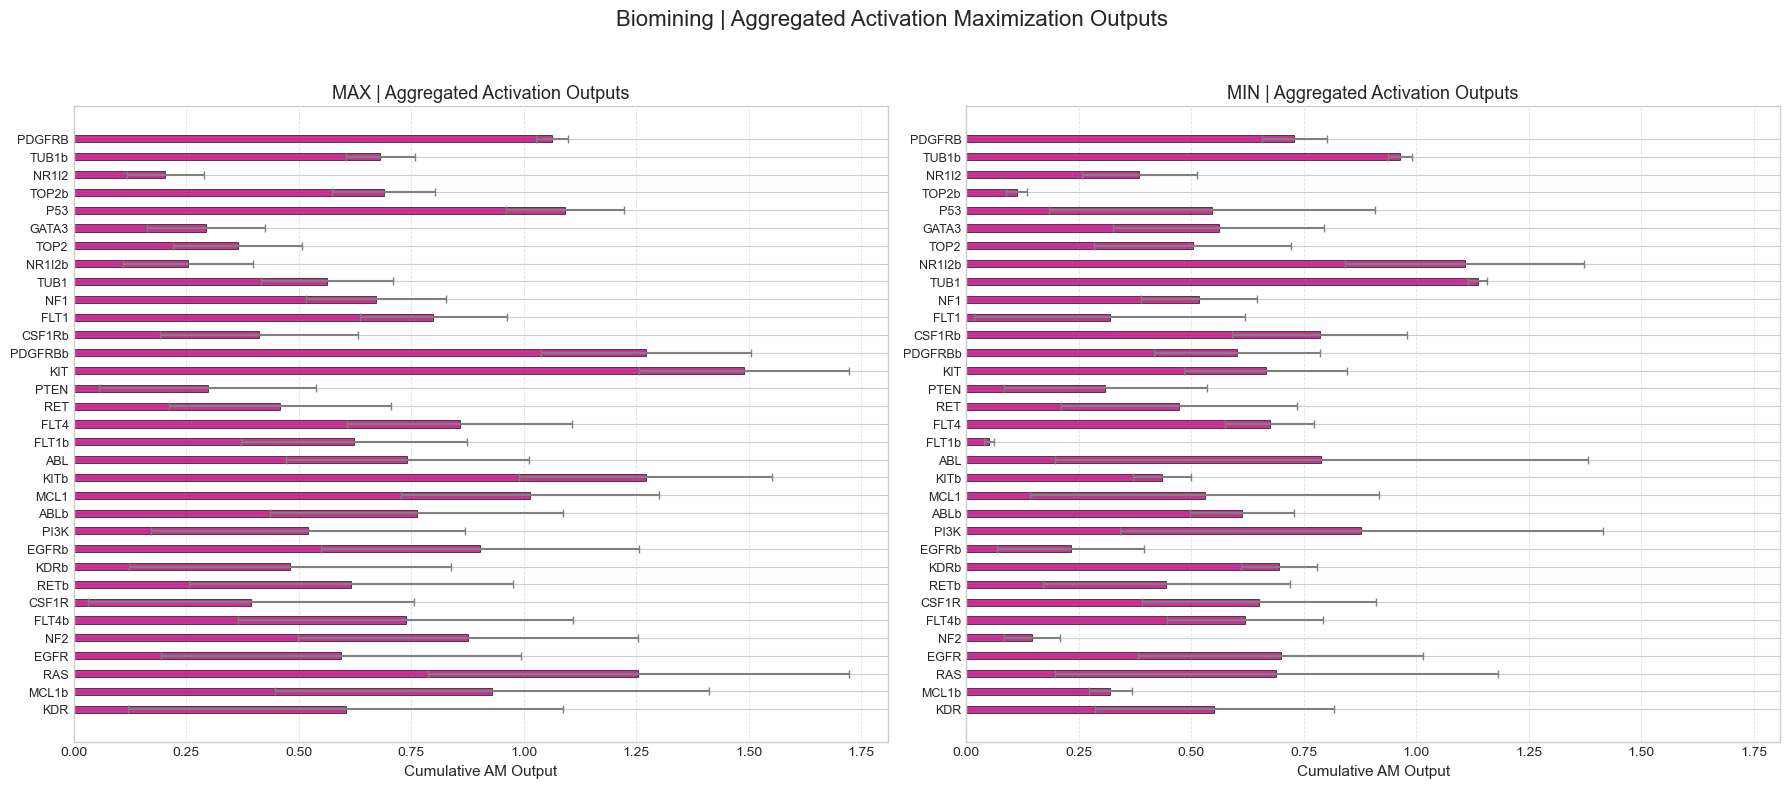

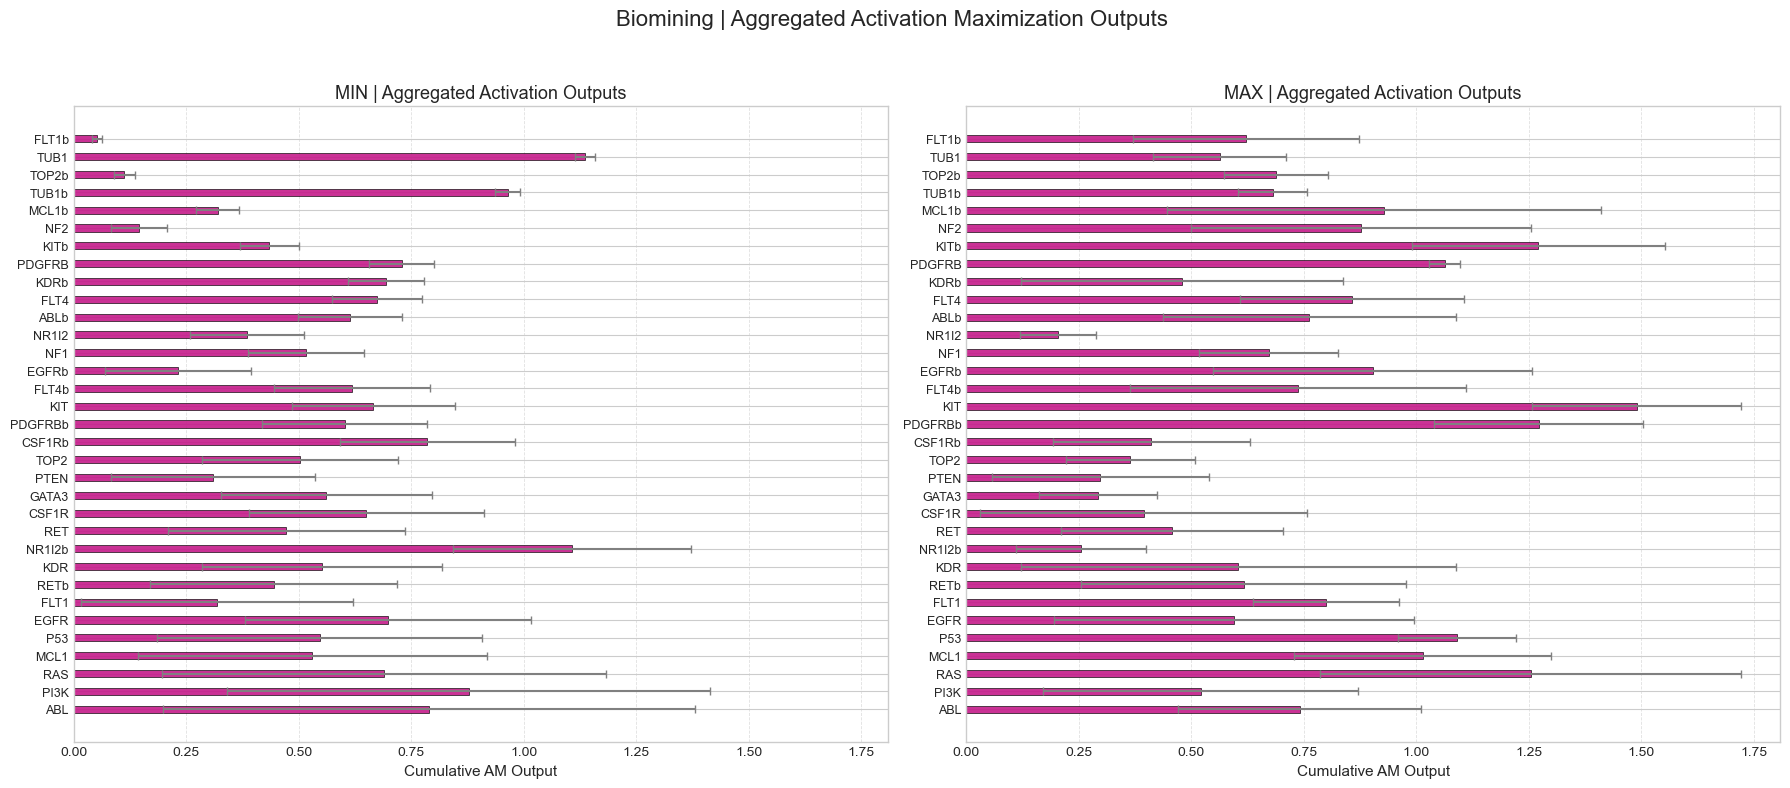

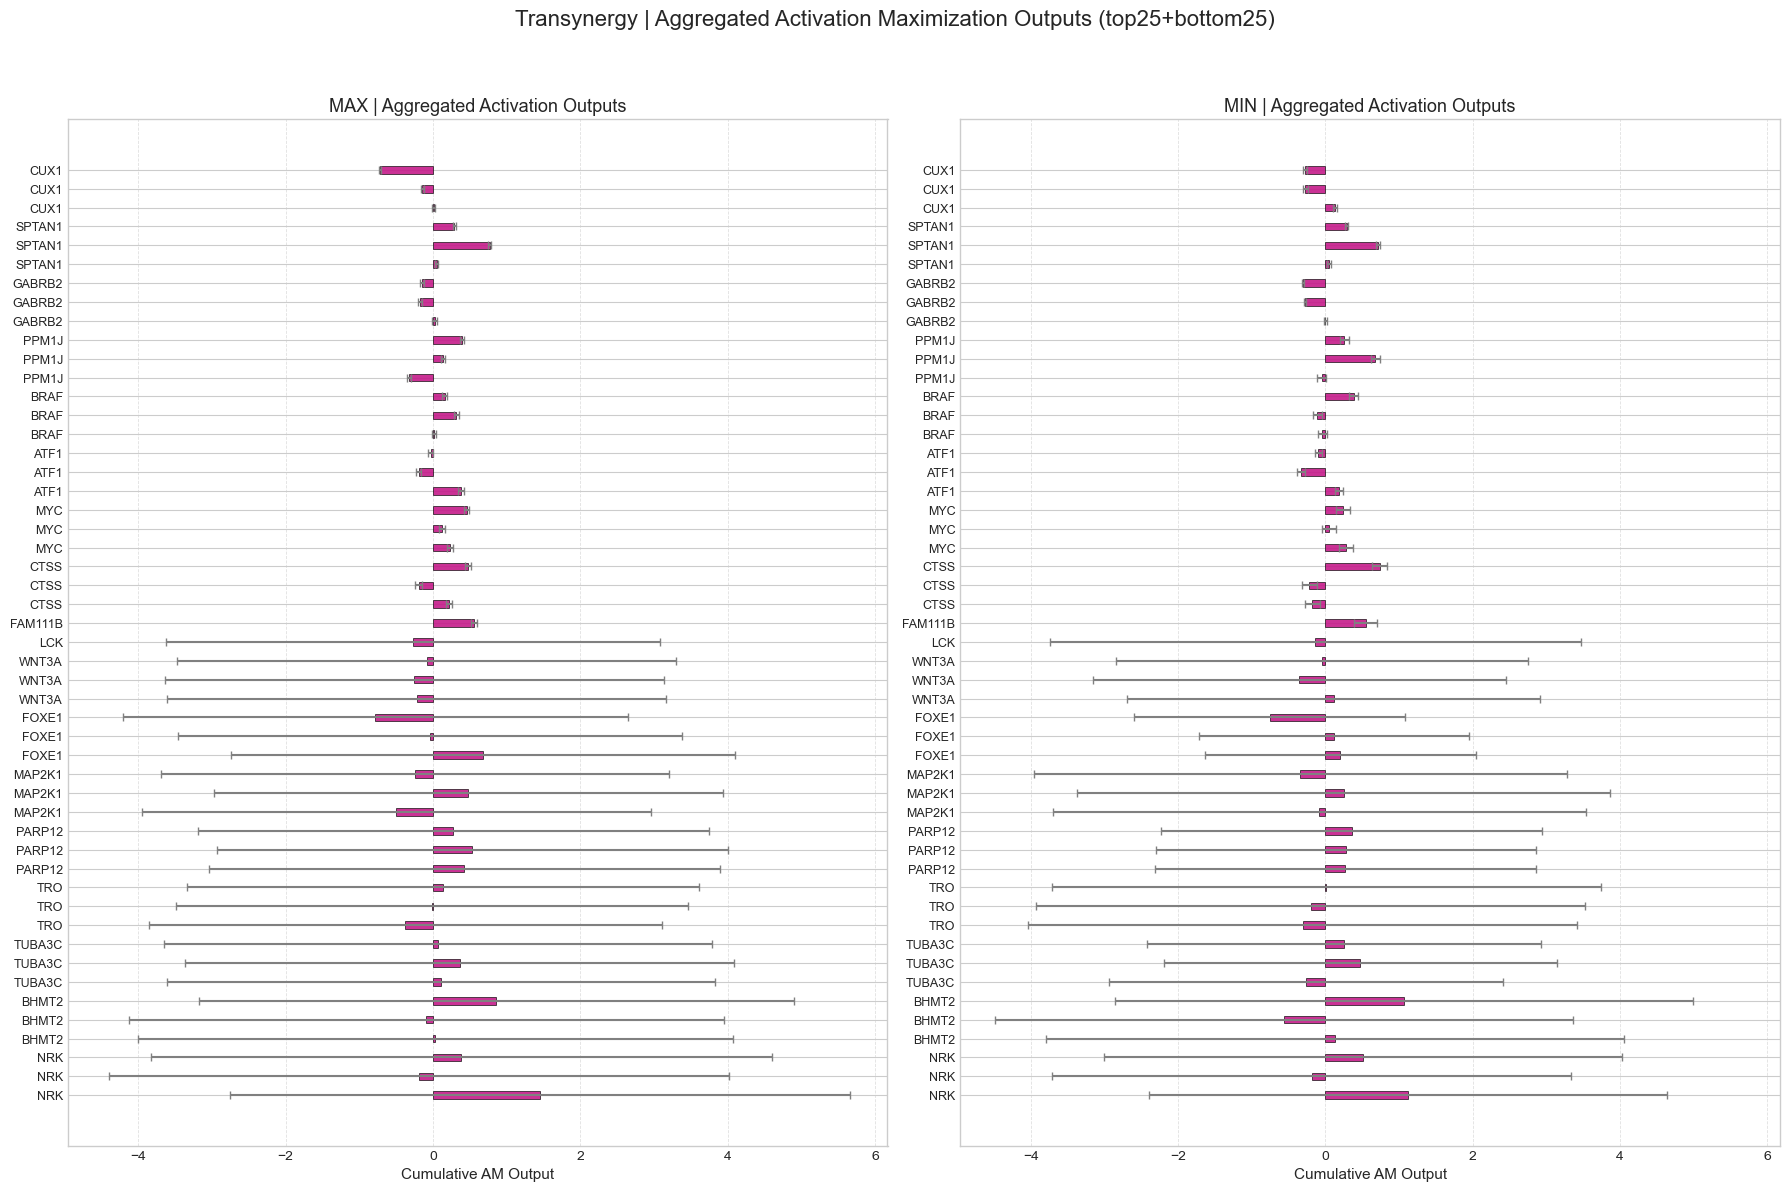

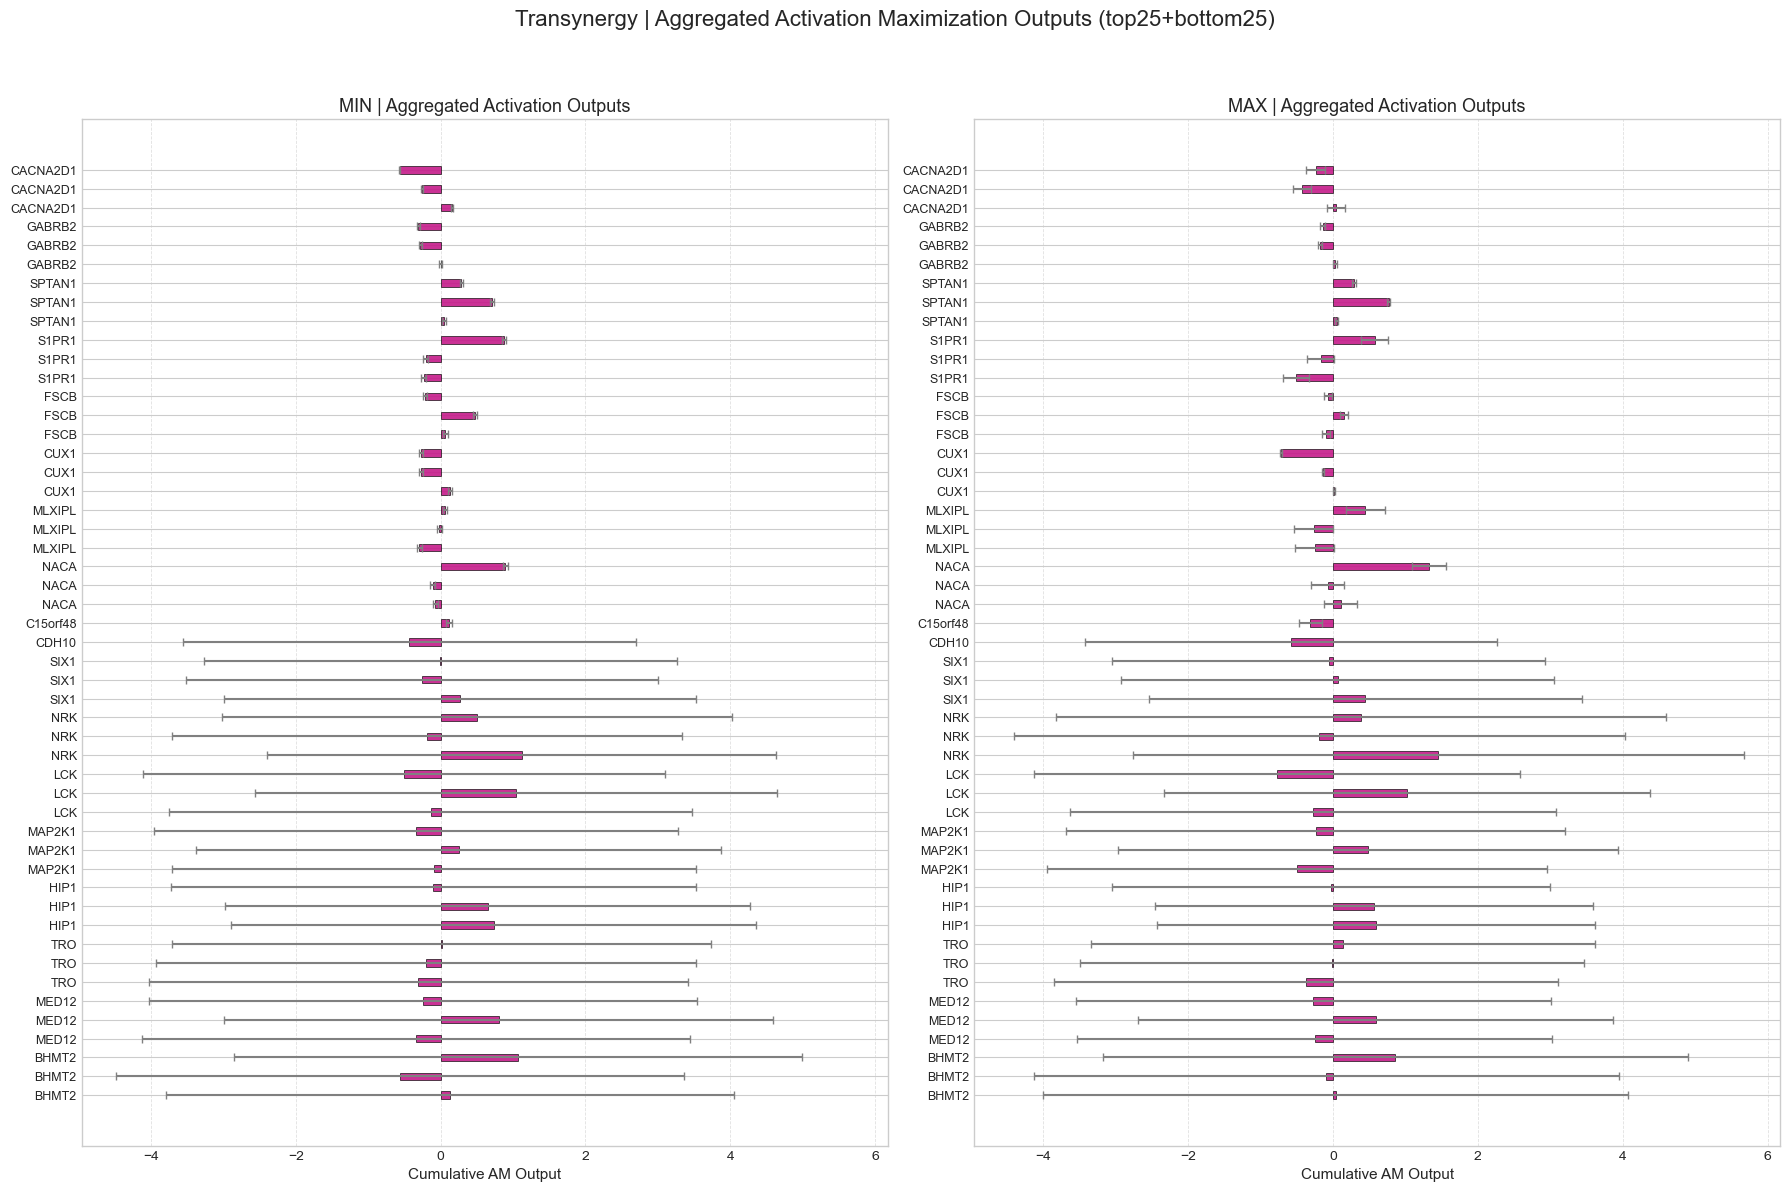

In [ ]:
for paper in papers:
    feature_names = ExplainationConfig(paper=paper).feature_names
    for minimaxis in [["max", "min"], ["min", "max"]]:
        SORTED_ORDER_INDICES = None
        dict_papers_indices_l2 = {}

        # Decide number of features to plot
        if len(feature_names) > 50:
            height = 50
            suffix = "(top25+bottom25)"
        else:
            height = len(feature_names)
            suffix = ""

        fig, axes = plt.subplots(1, 2, figsize=(18, max(6, height * 0.25)))

        for ax_idx, minimax in enumerate(minimaxis):
            feature_importance = torch.zeros(len(feature_names))
            for reg in ["l1", "l2", "none"]:
                path_to_experiment = f"C:/Users/ismyn/UNI/FU Berlin/SWP_Cancer/results/{paper}_{minimax}_reg_{reg}"
                for file in os.listdir(path_to_experiment):
                    if file.endswith(".pt"):
                        tensor = torch.load(os.path.join(path_to_experiment, file))
                        feature_importance += tensor
            feature_importance /= (5 * 3)

            feature_variance = total_variances_by_config[(paper, minimax)]

            # Sort by lowest variance
            full_sorted_indices = sorted(range(len(feature_names)), key=lambda i: feature_variance[feature_names[i]])

            dict_papers_indices_l2[(paper, minimax)] = full_sorted_indices

            if SORTED_ORDER_INDICES is None:
                if len(feature_names) > 50:
                    top_25 = full_sorted_indices[:25]
                    bottom_25 = full_sorted_indices[-25:]
                    SORTED_ORDER_INDICES = top_25 + bottom_25
                else:
                    SORTED_ORDER_INDICES = full_sorted_indices

            sorted_feature_names = [feature_names[i] for i in SORTED_ORDER_INDICES]
            sorted_values = [feature_importance[i] for i in SORTED_ORDER_INDICES]
            sorted_variances = [feature_variance[feature_names[i]] for i in SORTED_ORDER_INDICES]

            y = range(len(SORTED_ORDER_INDICES))
            bar_width = 0.4

            axes[ax_idx].barh(
                y,
                sorted_values,
                height=bar_width,
                color="#C51B8A",
                xerr=sorted_variances,
                ecolor='gray',
                alpha=0.9,
                capsize=3,
                linewidth=0.5,
                edgecolor="black"
            )

            axes[ax_idx].set_yticks(y)
            axes[ax_idx].set_yticklabels(sorted_feature_names, fontsize=9)
            axes[ax_idx].invert_yaxis()
            axes[ax_idx].set_xlabel("Cumulative AM Output", fontsize=11)
            axes[ax_idx].set_title(f"{minimax.upper()} | Aggregated Activation Outputs", fontsize=13)
            axes[ax_idx].grid(axis='x', linestyle='--', linewidth=0.6, alpha=0.6)

        # Align x-axis across subplots
        x_lims = [ax.get_xlim() for ax in axes]
        x_min = min(lim[0] for lim in x_lims)
        x_max = max(lim[1] for lim in x_lims)
        for ax in axes:
            ax.set_xlim(x_min, x_max)

        plt.suptitle(f"{paper.capitalize()} | Aggregated Activation Maximization Outputs {suffix}", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


In [70]:
# !jupyter nbconvert --execute --to html explainability/explainability.ipynb
